# Sc4 Project - Deep Learning

# 1. Ï£ºÏ†ú ÏÑ†Ï†ï
### üëâüèª Î∞îÏÅú ÏûêÏòÅÏóÖÏûêÎ•º ÏúÑÌïú Í¥ëÍ≥† Î¨∏Ïïà(a.k.a. Ïπ¥Ìîº) ÌÖçÏä§Ìä∏ ÏÉùÏÑ±Í∏∞ ÎßåÎì§Í∏∞
- ÏùåÏãù Î©îÎâ¥Î™Ö ÏûÖÎ†• Ïãú, Ï†ÅÌï©Ìïú Ïπ¥Ìîº ÏÉùÏÑ±

> ÏòàÏãú) 
- ÎßõÏûàÎäî ÍπÄÏπòÏ∞åÍ∞ú
- Í∞úÏö¥ÌïòÍ≥† ÍπîÎÅîÌïú ÍπÄÏπòÏ∞åÍ∞ú / Ï´ÑÍπÉÌïú Ìï≠Ï†ïÏÇ¥ÏùÑ Îì¨Îøç ÎÑ£ÏùÄ ÍπÄÏπòÏ∞åÍ∞ú

### üëâüèª Í¥ëÍ≥† Î¨∏ÏïàÏúºÎ°ú Î≤†Ïä§Ìä∏ÏÖÄÎü¨ ÏÉÅÌíà ÏòàÏ∏°ÌïòÍ∏∞

# 2. Îç∞Ïù¥ÌÑ∞ ÏÑ†Ï†ï
### - ÎßàÏºìÏª¨Î¶¨ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©


## Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
- Ï†úÎ™© Ïπ¥Ìîº
- Ïª®ÌÖêÏ∏† Ïπ¥Ìîº
- Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ïù∏Í∏∞ÏàúÏúÑ 30 ÏÉÅÌíà ÎùºÎ≤®ÎßÅ

In [ ]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
data = pd.read_csv('kurly.csv', index_col=0).drop('index', axis=1)
print('Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò :{}'.format(len(data['title'])))
data.head()

Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò :15669


title                                           contents
0                 \nÌï©Î¶¨Ï†Å Í∞ÄÍ≤©ÏúºÎ°ú ÎßåÎÇòÎäî Íµ≠ÎÇ¥ÏÇ∞ Ïï†Ìò∏Î∞ï\nÏï†Ìò∏Î∞ï\n  Ïñ¥Îäê ÏöîÎ¶¨ÏóêÎì† Ïñ¥Ïö∏Î¶¨Îäî, ÎßåÎä• Ï±ÑÏÜå ÏùºÏàúÏúÑÎ°ú ÏÜêÍºΩÌûàÎäî Ïï†Ìò∏Î∞ïÏùÑ Ìï©Î¶¨Ï†ÅÏù∏ Í∞ÄÍ≤©ÏúºÎ°ú Îßå...
1       \nÏõêÌïòÎäî ÎåÄÎ°ú ÏÑûÏñ¥ ÎßåÎìúÎäî ÌïòÎ£®Ïπò Í±¥Í∞ï\nÎ¨¥ÎÜçÏïΩ Í∞ÑÌé∏ ÏÉêÎü¨Îìú 6Ï¢Ö\n  ÏßôÏùÄ ÎÖπÏÉâÏùò ÏûéÏ±ÑÏÜåÎäî ÏãùÏù¥ÏÑ¨Ïú†Î∂ÄÌÑ∞ ÎØ∏ÎÑ§ÎûÑ, Ï≤†Î∂Ñ, ÎπÑÌÉÄÎØº, ÏóΩÏÇ∞ Îì± Í∞ÅÏ¢Ö ÏòÅÏñëÎ∂ÑÏù¥ ...
2  \nÎ¨¥ÎÜçÏïΩ ÏΩ©ÏúºÎ°ú Í∏∞Î•∏ Ïû•Ïù∏Ïùò ÎÇòÎ¨º\n[ÍπÄÍµ¨ÏõêÏÑ†ÏÉù] \nÍµ≠ÎÇ¥ÏÇ∞ Î¨¥ÎÜçÏïΩ ÏΩ©ÎÇòÎ¨º\n  4ÎåÄ Ïß∏ ÎëêÎ∂Ä Ïû•Ïù∏Ïùò Ï†ÑÌÜµÏùÑ Ïù¥Ïñ¥Ïò® Î∏åÎûúÎìú, ÍπÄÍµ¨ÏõêÏÑ†ÏÉùÏùò ÏΩ©ÎÇòÎ¨ºÏùÑ ÏÜåÍ∞úÌï†Í≤åÏöî. ÌñáÎπõ...
3                        \nÏ≤≠ÎüâÌïòÍ≥† ÏïÑÏÇ≠Ìïú Ï±ÑÏÜå\nÎã§Îã§Í∏∞Ïò§Ïù¥\n  ÎßàÎîîÎßàÎã§ Ïó¥Îß§Í∞Ä Îã§Îã•Îã§Îã• Ïó¥Î¶∞Îã§ ÌïòÏó¨ Î∂ôÏó¨ÏßÑ Ïù¥Î¶Ñ, Îã§Îã§Í∏∞Ïò§Ïù¥. Íº≠ÏßÄÎ°ú Í∞àÏàòÎ°ù Ï†êÏ∞®...
4                   \nÎßõÍ≥º ÏãùÍ∞ê, ÏòÅÏñëÎßàÏ†Ä Îõ∞Ïñ¥ÎÇú\nÏ∞∏ÌÉÄÎ¶¨ Î≤ÑÏÑØ\n  'Ï∞∏ÌÉÄÎ¶¨Î≤ÑÏÑØ' ÌïòÎ©¥ Ï°∞Í∏à ÎÇØÏÑ§Í≤å ÎäêÍª¥Ïßà Ïàò ÏûàÍ≤†ÏßÄÎßå, Ïö∞Î¶¨ÏóêÍ≤å ÏπúÏàôÌïú ÎäêÌÉÄÎ¶¨ Î≤ÑÏÑØÏùò...

In [ ]:
best = pd.read_csv('kurly_best.csv', index_col=0)
print('Î≤†Ïä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ïàò :{}'.format(len(best['title'])))
best.head()

Î≤†Ïä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ïàò :509


title  ... label
0                 \nÌï©Î¶¨Ï†Å Í∞ÄÍ≤©ÏúºÎ°ú ÎßåÎÇòÎäî Íµ≠ÎÇ¥ÏÇ∞ Ïï†Ìò∏Î∞ï\nÏï†Ìò∏Î∞ï\n  ...     1
1       \nÏõêÌïòÎäî ÎåÄÎ°ú ÏÑûÏñ¥ ÎßåÎìúÎäî ÌïòÎ£®Ïπò Í±¥Í∞ï\nÎ¨¥ÎÜçÏïΩ Í∞ÑÌé∏ ÏÉêÎü¨Îìú 6Ï¢Ö\n  ...     1
2  \nÎ¨¥ÎÜçÏïΩ ÏΩ©ÏúºÎ°ú Í∏∞Î•∏ Ïû•Ïù∏Ïùò ÎÇòÎ¨º\n[ÍπÄÍµ¨ÏõêÏÑ†ÏÉù] \nÍµ≠ÎÇ¥ÏÇ∞ Î¨¥ÎÜçÏïΩ ÏΩ©ÎÇòÎ¨º\n  ...     1
3                        \nÏ≤≠ÎüâÌïòÍ≥† ÏïÑÏÇ≠Ìïú Ï±ÑÏÜå\nÎã§Îã§Í∏∞Ïò§Ïù¥\n  ...     1
4                   \nÎßõÍ≥º ÏãùÍ∞ê, ÏòÅÏñëÎßàÏ†Ä Îõ∞Ïñ¥ÎÇú\nÏ∞∏ÌÉÄÎ¶¨ Î≤ÑÏÑØ\n  ...     1

[5 rows x 3 columns]

# Ï†ÑÏ≤òÎ¶¨
- '\n', '- Ï¢Ö' Îì± ÌÖçÏä§Ìä∏ ÏàòÏ†ï
- Î∏åÎûúÎìúÎ™Ö ÏÇ≠Ï†ú

In [ ]:
#best data + data
df = data.merge(best, on=['title', 'contents'], how='left')

#best data = 1, no best data = 0
df = df.fillna(0)

#Ï§ëÎ≥µÍ∞í Ï†úÍ±∞
df = df.drop_duplicates()

df.tail()

title  ... label
15757         \nÎ∞ãÎ∞ãÌïú Íµ≠Î¨º ÎßõÏù¥ Ìôï ÍπäÏñ¥ÏßÄÎäî\n[ÏÑ†Î¨ºÏÑ∏Ìä∏]\nÌï¥ÌÜµÎ†π ÎßõÍµ≠Î¨ºÍ±∞Î¶¨ ÏÑ∏Ìä∏\n  ...   0.0
15758         \nÎã¥Î∞±ÌïòÍ≥† Í≥†ÏÜåÌïú ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîºÏä§ÌÉÄÏπòÏò§\n[ÏõêÎçîÌíÄ] ÌîºÏä§ÌÉÄÏπòÏò§ Î¨¥Ïóº&Í∞ÄÏóº\n  ...   0.0
15759           \nÏßÑÌïú Í≥†ÏÜåÌï®ÏùÑ ÌíàÏùÄ ÌîÑÎ¶¨ÎØ∏ÏóÑ ÏïÑÎ™¨Îìú\n[ÏõêÎçîÌíÄ] ÏïÑÎ™¨Îìú Î¨¥Ïóº&Í∞ÄÏóº\n  ...   0.0
15760  \nÏÉàÏΩ§Îã¨ÏΩ§ Í≥ºÏùºÏùò ÌíçÎØ∏Í∞Ä Í∞ÄÎìù Îã¥Í∏¥\n[Í∞àÎ∞îÎãàÎÇò] Ïú†Í∏∞ÎÜç Í≥ºÏùº ÌÉÑÏÇ∞Ïàò 6Ï¢Ö (Î∞ïÏä§)\n  ...   0.0
15761           \nÍ∑ºÏÇ¨Ìïú Î∏åÎü∞ÏπòÎèÑ Í∞ÑÌé∏ÌïòÍ≤å\n[Ï†ïÎØ∏Í≤ΩÌÇ§Ïπú]\nÎã¨Í±Ä ÏÉåÎìúÏúÑÏπò Ïä§ÌîÑÎ†àÎìú\n  ...   0.0

[5 rows x 3 columns]

In [ ]:
#\n ÏàòÏ†ï
titles = df['title']
titles_=titles.str.replace('\n', ' ')
df['title']=titles_
df.head()

title  ... label
0                 Ìï©Î¶¨Ï†Å Í∞ÄÍ≤©ÏúºÎ°ú ÎßåÎÇòÎäî Íµ≠ÎÇ¥ÏÇ∞ Ïï†Ìò∏Î∞ï Ïï†Ìò∏Î∞ï   ...   1.0
1       ÏõêÌïòÎäî ÎåÄÎ°ú ÏÑûÏñ¥ ÎßåÎìúÎäî ÌïòÎ£®Ïπò Í±¥Í∞ï Î¨¥ÎÜçÏïΩ Í∞ÑÌé∏ ÏÉêÎü¨Îìú 6Ï¢Ö   ...   1.0
3   Î¨¥ÎÜçÏïΩ ÏΩ©ÏúºÎ°ú Í∏∞Î•∏ Ïû•Ïù∏Ïùò ÎÇòÎ¨º [ÍπÄÍµ¨ÏõêÏÑ†ÏÉù]  Íµ≠ÎÇ¥ÏÇ∞ Î¨¥ÎÜçÏïΩ ÏΩ©ÎÇòÎ¨º   ...   1.0
4                        Ï≤≠ÎüâÌïòÍ≥† ÏïÑÏÇ≠Ìïú Ï±ÑÏÜå Îã§Îã§Í∏∞Ïò§Ïù¥   ...   1.0
5                   ÎßõÍ≥º ÏãùÍ∞ê, ÏòÅÏñëÎßàÏ†Ä Îõ∞Ïñ¥ÎÇú Ï∞∏ÌÉÄÎ¶¨ Î≤ÑÏÑØ   ...   1.0

[5 rows x 3 columns]

In [ ]:
titles = []
titles.extend(list(df.title.values))
contents = []
contents.extend(list(df.contents.values))

In [ ]:
#Î∏åÎûúÎìúÎ™Ö ÏÇ≠Ï†ú

for i in range(len(titles)):
  titles[i]=re.sub(r'\[[^)]*\]', '', titles[i])

In [ ]:
#nÏ¢Ö ÏÇ≠Ï†ú
for j in range(len(titles)):
  for i in range(1,10):
    try:
      titles[j]=titles[j].replace(str(i)+'Ï¢Ö','')
    except:
      pass

df['title'] = titles
df.tail()

title  ... label
15757         Î∞ãÎ∞ãÌïú Íµ≠Î¨º ÎßõÏù¥ Ìôï ÍπäÏñ¥ÏßÄÎäî  Ìï¥ÌÜµÎ†π ÎßõÍµ≠Î¨ºÍ±∞Î¶¨ ÏÑ∏Ìä∏   ...   0.0
15758       Îã¥Î∞±ÌïòÍ≥† Í≥†ÏÜåÌïú ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌîºÏä§ÌÉÄÏπòÏò§  ÌîºÏä§ÌÉÄÏπòÏò§ Î¨¥Ïóº&Í∞ÄÏóº   ...   0.0
15759         ÏßÑÌïú Í≥†ÏÜåÌï®ÏùÑ ÌíàÏùÄ ÌîÑÎ¶¨ÎØ∏ÏóÑ ÏïÑÎ™¨Îìú  ÏïÑÎ™¨Îìú Î¨¥Ïóº&Í∞ÄÏóº   ...   0.0
15760   ÏÉàÏΩ§Îã¨ÏΩ§ Í≥ºÏùºÏùò ÌíçÎØ∏Í∞Ä Í∞ÄÎìù Îã¥Í∏¥  Ïú†Í∏∞ÎÜç Í≥ºÏùº ÌÉÑÏÇ∞Ïàò  (Î∞ïÏä§)   ...   0.0
15761            Í∑ºÏÇ¨Ìïú Î∏åÎü∞ÏπòÎèÑ Í∞ÑÌé∏ÌïòÍ≤å  Îã¨Í±Ä ÏÉåÎìúÏúÑÏπò Ïä§ÌîÑÎ†àÎìú   ...   0.0

[5 rows x 3 columns]

# EDA

## Îã®Ïñ¥ ÎπàÎèÑ Í∏∞Ï§Ä

#### ÌïúÍ∏Ä ÏãúÍ∞ÅÌôî Ìè∞Ìä∏ ÏÑ§Ïπò

In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic Eco


### ÌòïÌÉúÏÜå Î∂ÑÏÑù _ Î™ÖÏÇ¨, ÎèôÏÇ¨, ÌòïÏö©ÏÇ¨

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Okt  
okt=Okt()

In [ ]:
# Î∂àÏö©Ïñ¥, ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ ÌõÑ ÌÜ†ÌÅ∞Ìôî ÌïòÎäî Ìï®Ïàò
def text_stem(text,stopwords, okt):
    
    txt = re.sub('[^Í∞Ä-Ìû£a-z]', ' ', text)
    token = okt.pos(txt, stem=True)
    clean_words=[]
    for word in token:
      if word[0] not in stopwords and word[1] in ['Noun', 'Verb', 'Adjective'] and word[0] not in clean_words:
        clean_words.append(word[0])
        
    return clean_words

In [ ]:
# 'ÌïúÍµ≠Ïñ¥Î∂àÏö©Ïñ¥100'ÏúºÎ°ú Î∂àÏö©Ïñ¥ ÏßÄÏ†ï
stop = pd.read_csv('stopwords.txt', sep='\t', header=None)
stopwords = stop[0].to_list()
print(stopwords)

['Ïù¥', 'Ïûà', 'Ìïò', 'Í≤É', 'Îì§', 'Í∑∏', 'Îêò', 'Ïàò', 'Ïù¥', 'Î≥¥', 'Ïïä', 'ÏóÜ', 'ÎÇò', 'ÏÇ¨Îûå', 'Ï£º', 'ÏïÑÎãà', 'Îì±', 'Í∞ô', 'Ïö∞Î¶¨', 'Îïå', 'ÎÖÑ', 'Í∞Ä', 'Ìïú', 'ÏßÄ', 'ÎåÄÌïò', 'Ïò§', 'Îßê', 'Ïùº', 'Í∑∏Î†á', 'ÏúÑÌïò', 'ÎïåÎ¨∏', 'Í∑∏Í≤É', 'Îëê', 'ÎßêÌïò', 'Ïïå', 'Í∑∏Îü¨ÎÇò', 'Î∞õ', 'Î™ªÌïò', 'Ïùº', 'Í∑∏Îü∞', 'Îòê', 'Î¨∏Ï†ú', 'Îçî', 'ÏÇ¨Ìöå', 'Îßé', 'Í∑∏Î¶¨Í≥†', 'Ï¢ã', 'ÌÅ¨', 'Îî∞Î•¥', 'Ï§ë', 'ÎÇòÏò§', 'Í∞ÄÏßÄ', 'Ïî®', 'ÏãúÌÇ§', 'ÎßåÎì§', 'ÏßÄÍ∏à', 'ÏÉùÍ∞ÅÌïò', 'Í∑∏Îü¨', 'ÏÜç', 'ÌïòÎÇò', 'Ïßë', 'ÏÇ¥', 'Î™®Î•¥', 'Ï†Å', 'Ïõî', 'Îç∞', 'ÏûêÏã†', 'Ïïà', 'Ïñ¥Îñ§', 'ÎÇ¥', 'ÎÇ¥', 'Í≤ΩÏö∞', 'Î™Ö', 'ÏÉùÍ∞Å', 'ÏãúÍ∞Ñ', 'Í∑∏ÎÖÄ', 'Îã§Ïãú', 'Ïù¥Îü∞', 'Ïïû', 'Î≥¥Ïù¥', 'Î≤à', 'ÎÇò', 'Îã§Î•∏', 'Ïñ¥Îñª', 'Ïó¨Ïûê', 'Í∞ú', 'Ï†Ñ', 'Îì§', 'ÏÇ¨Ïã§', 'Ïù¥Î†á', 'Ï†ê', 'Ïã∂', 'Îßê', 'Ï†ïÎèÑ', 'Ï¢Ä', 'Ïõê', 'Ïûò', 'ÌÜµÌïò', 'ÏÜåÎ¶¨', 'ÎÜì']


In [ ]:
text_stem(titles[0], stopwords, okt)

['Ìï©Î¶¨', 'Í∞ÄÍ≤©', 'ÎßåÎÇòÎã§', 'Íµ≠ÎÇ¥', 'ÏÇ∞', 'Ïï†Ìò∏Î∞ï']

In [ ]:
# titleÍ≥º contentsÏóê Ï†ÅÏö©
title_token = []
for i in range(len(titles)):
  title_token.append(text_stem(titles[i],stopwords,okt))

contents_token = []
for i in range(len(contents)):
  contents_token.append(text_stem(contents[i],stopwords,okt))

In [ ]:
print(titles[0])
print(title_token[0],'\n')
print(contents[0])
print(contents_token[0])

 Ìï©Î¶¨Ï†Å Í∞ÄÍ≤©ÏúºÎ°ú ÎßåÎÇòÎäî Íµ≠ÎÇ¥ÏÇ∞ Ïï†Ìò∏Î∞ï Ïï†Ìò∏Î∞ï 
['Ìï©Î¶¨', 'Í∞ÄÍ≤©', 'ÎßåÎÇòÎã§', 'Íµ≠ÎÇ¥', 'ÏÇ∞', 'Ïï†Ìò∏Î∞ï'] 

Ïñ¥Îäê ÏöîÎ¶¨ÏóêÎì† Ïñ¥Ïö∏Î¶¨Îäî, ÎßåÎä• Ï±ÑÏÜå ÏùºÏàúÏúÑÎ°ú ÏÜêÍºΩÌûàÎäî Ïï†Ìò∏Î∞ïÏùÑ Ìï©Î¶¨Ï†ÅÏù∏ Í∞ÄÍ≤©ÏúºÎ°ú ÎßåÎÇòÎ≥¥ÏÑ∏Ïöî. Ï†ÑÍµ≠Ïùò ÌíàÏßà Ï¢ãÏùÄ ÎÜçÏÇ∞Î¨ºÏù¥ Î™®Ïó¨ÎìúÎäî Í∞ÄÎùΩÏãúÏû•ÏóêÏÑú Í≥µÏàòÌñàÎãµÎãàÎã§. Îßõ Ï¢ãÍ≥† ÌíàÏßà Îõ∞Ïñ¥ÎÇú Íµ≠ÎÇ¥ÏÇ∞ Ïï†Ìò∏Î∞ïÏù¥Ï£†. ÏÑ†Î™ÖÌïú Ïó∞Îë£Îπõ Í≥ºÌîº ÏÜçÏúºÎ°úÎäî Î∂ÄÎìúÎü¨Ïö¥ ÏãùÍ∞êÍ≥º Î≥∏Ïó∞Ïùò Îã® ÎÇ¥ÏùåÏù¥ Ïã†ÏÑ†ÌïòÍ≤å ÏÇ¥ÏïÑ ÏûàÏñ¥Ïöî. ÏãùÏù¥ÏÑ¨Ïú†, ÏπºÎ•®, ÎπÑÌÉÄÎØº Îì± Í∞ÅÏ¢Ö ÏòÅÏñëÏù¥ ÌíçÎ∂ÄÌïú Í≤ÉÏùÄ Î¨ºÎ°†Ïù¥Í≥†Ïöî. ÎßõÍ≥º ÏòÅÏñëÏùÑ Î≥¥Ïû•ÌïòÎäî Ïï†Ìò∏Î∞ïÏúºÎ°ú Ïï†Ìò∏Î∞ïÏ†Ñ, Ïï†Ìò∏Î∞ï Ï∞åÍ∞ú, Ïï†Ìò∏Î∞ï Î¨¥Ïπ®, Ïï†Ìò∏Î∞ï ÏàòÌîÑ Îì±Ïùò ÏöîÎ¶¨Î•º Îã§Ï±ÑÎ°≠Í≤å Ï¶êÍ≤®Î≥¥ÏÑ∏Ïöî. 1Í∞úÏûÖÏî© Ï§ÄÎπÑÌñàÏúºÎãà, Í∑∏ÎïåÍ∑∏Îïå ÏõêÌïòÎäî ÎßåÌÅºÏî© Îã¥ÏïÑ Í∞ÄÏÑ∏Ïöî.
['ÏöîÎ¶¨', 'Ïñ¥Ïö∏Î¶¨Îã§', 'ÎßåÎä•', 'Ï±ÑÏÜå', 'ÏúÑÎ°ú', 'ÏÜêÍºΩÎã§', 'Ïï†Ìò∏Î∞ï', 'Ìï©Î¶¨', 'Í∞ÄÍ≤©', 'ÎßåÎÇòÎã§', 'Î≥¥Îã§', 'Ï†ÑÍµ≠', 'ÌíàÏßà', 'Ï¢ãÎ

In [ ]:
df['stem_title'] = title_token
df['stem_contents'] = contents_token
df.head()

title  ...                                      stem_contents
0           Ìï©Î¶¨Ï†Å Í∞ÄÍ≤©ÏúºÎ°ú ÎßåÎÇòÎäî Íµ≠ÎÇ¥ÏÇ∞ Ïï†Ìò∏Î∞ï Ïï†Ìò∏Î∞ï   ...  [ÏöîÎ¶¨, Ïñ¥Ïö∏Î¶¨Îã§, ÎßåÎä•, Ï±ÑÏÜå, ÏúÑÎ°ú, ÏÜêÍºΩÎã§, Ïï†Ìò∏Î∞ï, Ìï©Î¶¨, Í∞ÄÍ≤©, ÎßåÎÇòÎã§, ...
1   ÏõêÌïòÎäî ÎåÄÎ°ú ÏÑûÏñ¥ ÎßåÎìúÎäî ÌïòÎ£®Ïπò Í±¥Í∞ï Î¨¥ÎÜçÏïΩ Í∞ÑÌé∏ ÏÉêÎü¨Îìú    ...  [ÏßôÎã§, ÎÖπÏÉâ, ÏûéÏ±ÑÏÜå, ÏãùÏù¥ÏÑ¨Ïú†, ÎØ∏ÎÑ§ÎûÑ, Ï≤†Î∂Ñ, ÎπÑÌÉÄÎØº, ÏóΩÏÇ∞, Í∞ÅÏ¢Ö, ÏòÅÏñëÎ∂Ñ,...
3    Î¨¥ÎÜçÏïΩ ÏΩ©ÏúºÎ°ú Í∏∞Î•∏ Ïû•Ïù∏Ïùò ÎÇòÎ¨º   Íµ≠ÎÇ¥ÏÇ∞ Î¨¥ÎÜçÏïΩ ÏΩ©ÎÇòÎ¨º   ...  [ÎåÄÎã§, Ïß∏Îã§, ÎëêÎ∂Ä, Ïû•Ïù∏, Ï†ÑÌÜµ, Ïù¥Îã§, Ïò®, Î∏åÎûúÎìú, ÍπÄÍµ¨, ÏÑ†ÏÉù, ÏΩ©ÎÇòÎ¨º, ...
4                  Ï≤≠ÎüâÌïòÍ≥† ÏïÑÏÇ≠Ìïú Ï±ÑÏÜå Îã§Îã§Í∏∞Ïò§Ïù¥   ...  [ÎßàÎîî, Ïó¥Îß§, Î¶∞Îã§, ÌïòÎã§, Î∂ôÏù¥Îã§, Ïù¥Î¶Ñ, Îã§Îã§, Ïò§Ïù¥, Íº≠ÏßÄ, Í∞àÏàòÎ°ù, Ï†êÏ∞®,...
5             ÎßõÍ≥º ÏãùÍ∞ê, ÏòÅÏñëÎßàÏ†Ä Îõ∞Ïñ¥ÎÇú Ï∞∏ÌÉÄÎ¶¨ Î≤ÑÏÑØ   ...  [Ï∞®Îã§, ÌÉÄÎã§, Î≤ÑÏÑØ, ÌïòÎã§, Ï°∞Í∏à, ÎÇØÏÑ§Îã§, ÎäêÍª¥ÏßÄÎã§, ÏûàÎã§, ÏπúÏàôÌïòÎã§, ÎäêÌÉÄÎ¶¨,...

[5 rows x 5 columns]

#### Îã®Ïñ¥ Ïπ¥Ïö¥Ìä∏

In [ ]:
def word_count(docs):
    """ ÌÜ†ÌÅ∞ÌôîÎêú Î¨∏ÏÑúÎì§ÏùÑ ÏûÖÎ†•Î∞õÏïÑ ÌÜ†ÌÅ∞ÏùÑ Ïπ¥Ïö¥Ìä∏ ÌïòÍ≥† Í¥ÄÎ†®Îêú ÏÜçÏÑ±ÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Î¶¨ÌÑ¥Ìï©ÎãàÎã§.
    Args:
        docs (series or list): ÌÜ†ÌÅ∞ÌôîÎêú Î¨∏ÏÑúÍ∞Ä Îì§Ïñ¥ÏûàÎäî list
    Returns:
        list: Dataframe
    """
    # Ï†ÑÏ≤¥ ÏΩîÌçºÏä§ÏóêÏÑú Îã®Ïñ¥ ÎπàÎèÑ Ïπ¥Ïö¥Ìä∏
    word_counts = Counter()

    # Îã®Ïñ¥Í∞Ä Ï°¥Ïû¨ÌïòÎäî Î¨∏ÏÑúÏùò ÎπàÎèÑ Ïπ¥Ïö¥Ìä∏, Îã®Ïñ¥Í∞Ä Ìïú Î≤à Ïù¥ÏÉÅ Ï°¥Ïû¨ÌïòÎ©¥ +1
    word_in_docs = Counter()

    # Ï†ÑÏ≤¥ Î¨∏ÏÑúÏùò Í∞ØÏàò
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # Îã®Ïñ¥Ïùò ÏàúÏúÑ
    # method='first': Í∞ôÏùÄ Í∞íÏùò Í≤ΩÏö∞ Î®ºÏ†ÄÎÇòÏò® ÏöîÏÜåÎ•º Ïö∞ÏÑ†
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # ÏΩîÌçºÏä§ ÎÇ¥ Îã®Ïñ¥Ïùò ÎπÑÏú®
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # ÎàÑÏ†Å ÎπÑÏú®
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # Ï†ÑÏ≤¥ Î¨∏ÏÑú Ï§ë Ï°¥Ïû¨ÌïòÎäî ÎπÑÏú®
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [ ]:
# title Ïπ¥Ïö¥Ìä∏
title_wc = word_count(df['stem_title'])
title_wc.head(15)

word  word_in_docs  count  ...   percent  cul_percent  word_in_docs_percent
39     ÌïòÎã§          1598   1598  ...  0.017446     0.017446              0.128292
55    Ï¶êÍ∏∞Îã§           965    965  ...  0.010536     0.027982              0.077473
27      Îßõ           888    888  ...  0.009695     0.037677              0.071291
148  Î∂ÄÎìúÎüΩÎã§           641    641  ...  0.006998     0.044675              0.051461
248     ÏúÑ           589    589  ...  0.006430     0.051105              0.047286
40   Í≥†ÏÜåÌïòÎã§           560    560  ...  0.006114     0.057219              0.044958
95   Îã¨ÏΩ§ÌïòÎã§           521    521  ...  0.005688     0.062907              0.041827
107  Í∞ÑÌé∏ÌïòÎã§           507    507  ...  0.005535     0.068443              0.040703
68      Ìñ•           487    487  ...  0.005317     0.073759              0.039098
186    Î∞âÎã§           466    466  ...  0.005088     0.078847              0.037412
8     ÎßåÎì§Îã§           458    458  ...  0.005000     0.083847              0.036769
256    ÏÑ∏Ìä∏           440    440  ...  0.004804     0.088651              0.035324
171   Ïú†Í∏∞ÎÜç           432    432  ...  0.004716     0.093368              0.034682
319    Îã¥Îã§           430    430  ...  0.004695     0.098062              0.034522
293   ÎçîÌïòÎã§           339    339  ...  0.003701     0.101763              0.027216

[15 rows x 7 columns]

In [ ]:
# contents Ïπ¥Ïö¥Ìä∏
contents_wc = word_count(df['stem_contents'])
contents_wc.head(15)

word  word_in_docs  count  ...   percent  cul_percent  word_in_docs_percent
31    ÌïòÎã§         12063  12063  ...  0.017811     0.017811              0.968449
2     ÏûàÎã§          9365   9365  ...  0.013827     0.031638              0.751846
16    Î≥¥Îã§          7864   7864  ...  0.011611     0.043248              0.631342
36    Ï¢ãÎã§          4898   4898  ...  0.007232     0.050480              0.393224
85     Í±∞          4871   4871  ...  0.007192     0.057672              0.391057
42     Îßõ          4719   4719  ...  0.006967     0.064639              0.378854
0    Ï¶êÍ∏∞Îã§          4715   4715  ...  0.006961     0.071601              0.378532
176  ÎßåÎì§Îã§          4389   4389  ...  0.006480     0.078081              0.352360
69    ÏïäÎã§          4014   4014  ...  0.005926     0.084007              0.322254
204   ÏÇ¨Ïö©          3954   3954  ...  0.005838     0.089845              0.317437
114   ÎêòÎã§          3941   3941  ...  0.005819     0.095664              0.316394
100   ÏÜåÍ∞ú          3742   3742  ...  0.005525     0.101189              0.300417
1     Îã¥Îã§          3619   3619  ...  0.005343     0.106532              0.290543
15    Ï§ÄÎπÑ          3418   3418  ...  0.005047     0.111579              0.274406
113   Ï†úÌíà          3318   3318  ...  0.004899     0.116478              0.266378

[15 rows x 7 columns]

In [ ]:
!pip install squarify

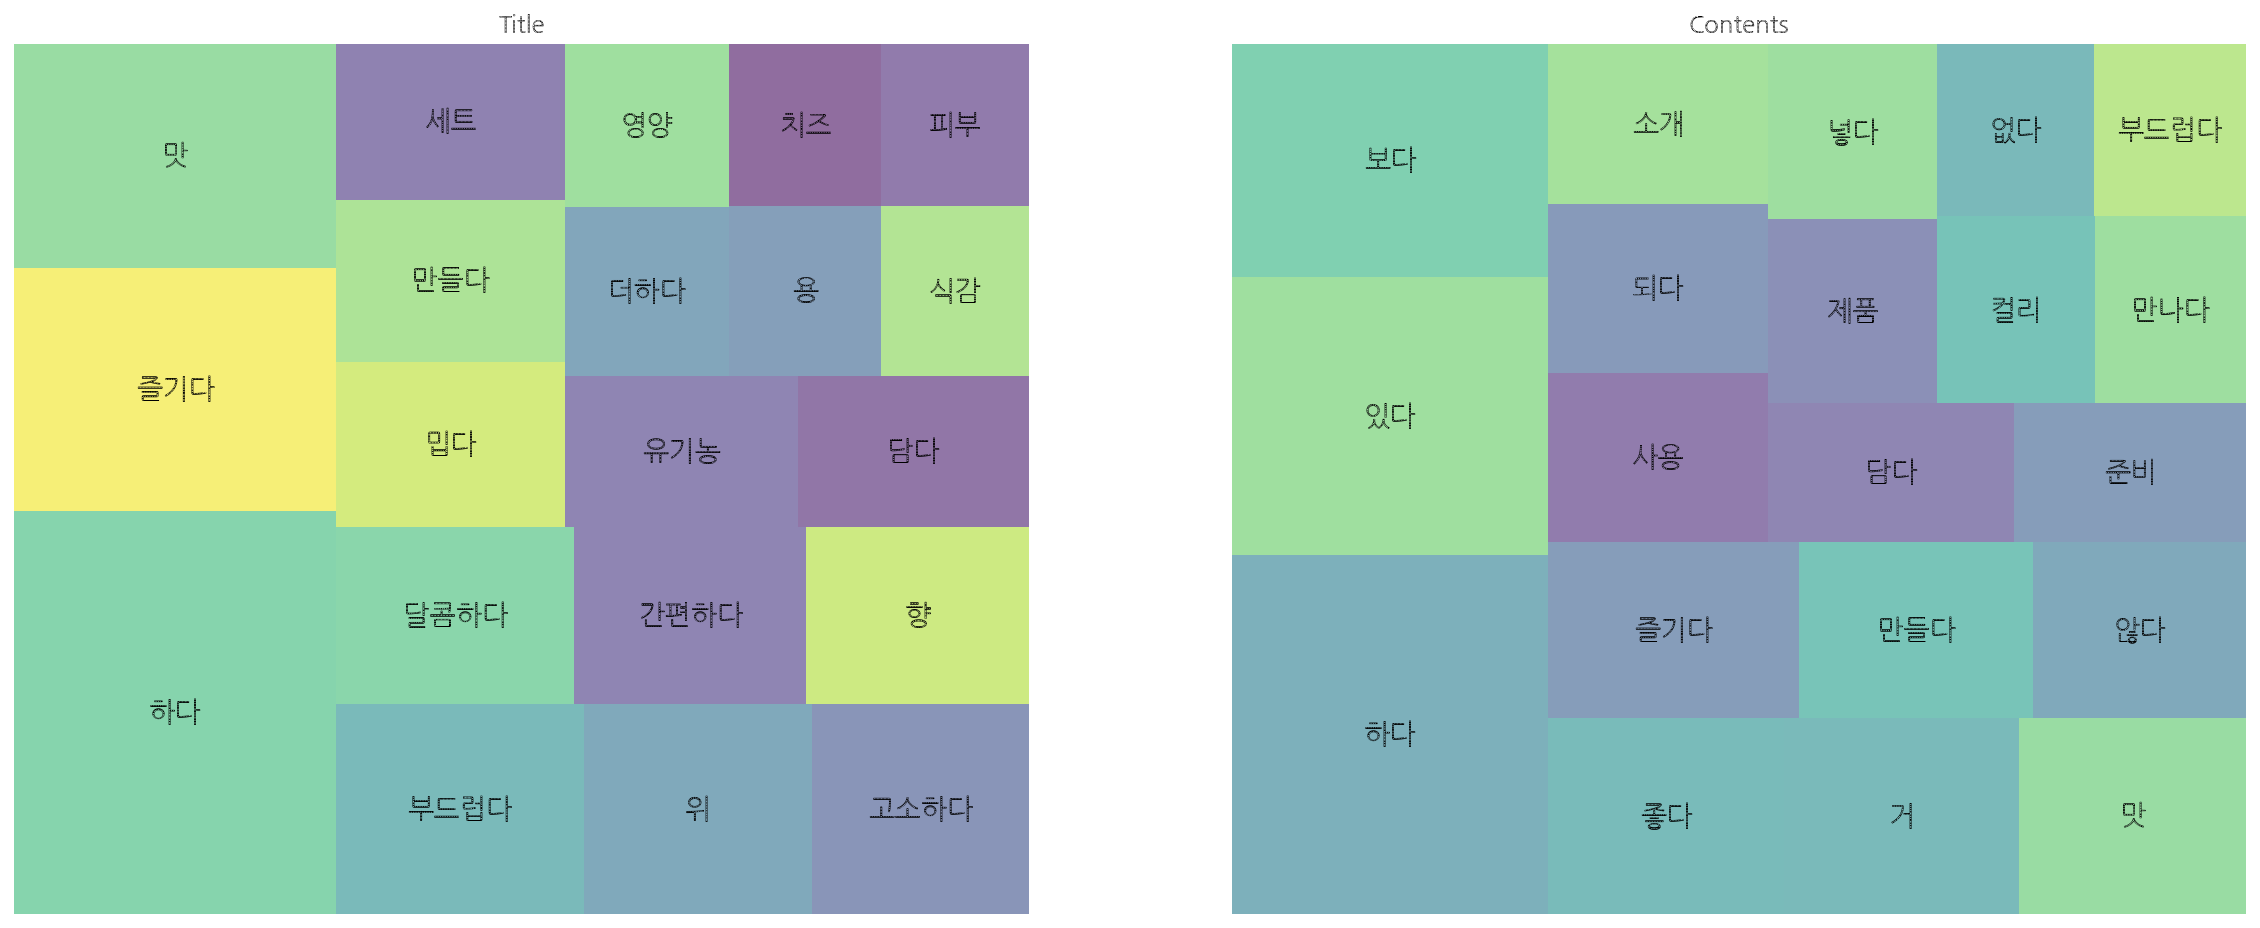

In [ ]:
# ÏãúÍ∞ÅÌôî
import squarify
%config InlineBackend.figure_format='retina'

wc_top20 = title_wc[title_wc['rank'] <= 20]
wc_contents_top20 = contents_wc[contents_wc['rank'] <= 20]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes[0].set_title('Title')
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6, ax=axes[0], text_kwargs={'fontsize':14})
axes[0].axis('off')

axes[1].set_title('Contents')
squarify.plot(sizes=wc_contents_top20['percent'], label=wc_contents_top20['word'], alpha=0.6, ax=axes[1], text_kwargs={'fontsize':14})
axes[1].axis('off')

plt.show()

### ÌòïÏö©ÏÇ¨ ÌÜ†ÌÅ∞Ìôî

In [ ]:
# Î∂àÏö©Ïñ¥, ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ ÌõÑ ÌÜ†ÌÅ∞Ìôî ÌïòÎäî Ìï®Ïàò
def text_adj(text):
    
    txt = re.sub('[^Í∞Ä-Ìû£a-z]', ' ', text)
    token = okt.pos(txt, stem=True)
    adj=[]
    for word in token:
      if word[1] in ['Adjective']:
        adj.append(word[0])
        
    return adj

In [ ]:
# titleÍ≥º contentsÏóê Ï†ÅÏö©
title_adj = []
for i in range(len(titles)):
  title_adj.append(text_adj(titles[i]))

contents_adj = []
for i in range(len(contents)):
  contents_adj.append(text_adj(contents[i]))

In [ ]:
df['adj_title'] = title_adj
df['adj_contents'] = contents_adj
df.head()

title  ...                                       adj_contents
0           Ìï©Î¶¨Ï†Å Í∞ÄÍ≤©ÏúºÎ°ú ÎßåÎÇòÎäî Íµ≠ÎÇ¥ÏÇ∞ Ïï†Ìò∏Î∞ï Ïï†Ìò∏Î∞ï   ...    [Ï¢ãÎã§, Ï¢ãÎã§, Îõ∞Ïñ¥ÎÇòÎã§, ÏÑ†Î™ÖÌïòÎã§, Î∂ÄÎìúÎüΩÎã§, Ïã†ÏÑ†ÌïòÎã§, ÏûàÎã§, ÌíçÎ∂ÄÌïòÎã§, ÏõêÌïòÎã§]
1   ÏõêÌïòÎäî ÎåÄÎ°ú ÏÑûÏñ¥ ÎßåÎìúÎäî ÌïòÎ£®Ïπò Í±¥Í∞ï Î¨¥ÎÜçÏïΩ Í∞ÑÌé∏ ÏÉêÎü¨Îìú    ...                               [ÏßôÎã§, ÌíçÎ∂ÄÌïòÎã§, Í∞ÑÌé∏ÌïòÎã§, ÏûàÎã§]
3    Î¨¥ÎÜçÏïΩ ÏΩ©ÏúºÎ°ú Í∏∞Î•∏ Ïû•Ïù∏Ïùò ÎÇòÎ¨º   Íµ≠ÎÇ¥ÏÇ∞ Î¨¥ÎÜçÏïΩ ÏΩ©ÎÇòÎ¨º   ...                        [Ï§ëÏöîÌïòÎã§, ÏïàÏ†ÑÌïòÎã§, ÌïÑÏöîÌïòÎã§, ÏÜêÏâΩÎã§, ÏûàÎã§]
4                  Ï≤≠ÎüâÌïòÍ≥† ÏïÑÏÇ≠Ìïú Ï±ÑÏÜå Îã§Îã§Í∏∞Ïò§Ïù¥   ...         [Îõ∞Ïñ¥ÎÇòÎã§, ÏûàÎã§, Ïö∞ÏàòÌïòÎã§, Îã§ÏñëÌïòÎã§, Ï¢ãÎã§, ÏóÜÎã§, ÏïåÎú∞ÌïòÎã§, Ïã±Í∑∏ÎüΩÎã§]
5             ÎßõÍ≥º ÏãùÍ∞ê, ÏòÅÏñëÎßàÏ†Ä Îõ∞Ïñ¥ÎÇú Ï∞∏ÌÉÄÎ¶¨ Î≤ÑÏÑØ   ...  [ÎÇØÏÑ§Îã§, ÏûàÎã§, ÏπúÏàôÌïòÎã§, ÏóÜÎã§, ÏïÑÎãàÎã§, Îã§ÏñëÌïòÎã§, ÏóÜÎã§, Îõ∞Ïñ¥ÎÇòÎã§, Ìé∏ÏïàÌïòÎã§,...

[5 rows x 7 columns]

In [ ]:
word_count(df['adj_title']).head()

word  word_in_docs  count  ...   percent  cul_percent  word_in_docs_percent
25  Î∂ÄÎìúÎüΩÎã§           641    649  ...  0.061128     0.061128              0.051461
3   Í≥†ÏÜåÌïòÎã§           560    565  ...  0.053217     0.114345              0.044958
16  Îã¨ÏΩ§ÌïòÎã§           521    524  ...  0.049355     0.163700              0.041827
20  Í∞ÑÌé∏ÌïòÎã§           507    508  ...  0.047848     0.211548              0.040703
29    Î∞âÎã§           466    473  ...  0.044551     0.256099              0.037412

[5 rows x 7 columns]

In [ ]:
word_count(df['adj_contents']).head()

word  word_in_docs  count  ...   percent  cul_percent  word_in_docs_percent
1     ÏûàÎã§          9365  17107  ...  0.154538     0.154538              0.751846
6     Ï¢ãÎã§          4898   6333  ...  0.057210     0.211747              0.393224
15    ÏóÜÎã§          2868   3295  ...  0.029766     0.241513              0.230250
3   Î∂ÄÎìúÎüΩÎã§          2805   3051  ...  0.027561     0.269074              0.225193
9   Í∞ÑÌé∏ÌïòÎã§          2620   2776  ...  0.025077     0.294152              0.210340

[5 rows x 7 columns]

#### word cloud

In [ ]:
!pip install konlpy wordcloud

In [ ]:
from collections import Counter

# Counter Í∞ùÏ≤¥Îäî Î¶¨Ïä§Ìä∏ÏöîÏÜåÏùò Í∞íÍ≥º ÏöîÏÜåÏùò Í∞ØÏàòÎ•º Ïπ¥Ïö¥Ìä∏ ÌïòÏó¨ Ï†ÄÏû•ÌïòÍ≥† ÏûàÏäµÎãàÎã§.
# Ïπ¥Ïö¥ÌÑ∞ Í∞ùÏ≤¥Îäî .update Î©îÏÜåÎìúÎ°ú Í≥ÑÏÜç ÏóÖÎç∞Ïù¥Ìä∏ Í∞ÄÎä•Ìï©ÎãàÎã§.
word_counts = Counter()

# ÌÜ†ÌÅ∞ÌôîÎêú Í∞Å Î¶¨Î∑∞ Î¶¨Ïä§Ìä∏Î•º Ïπ¥Ïö¥ÌÑ∞ Í∞ùÏ≤¥Ïóê ÏóÖÎç∞Ïù¥Ìä∏ Ìï©ÎãàÎã§. 
df['adj_title'].apply(lambda x: word_counts.update(x))

# Í∞ÄÏû• ÎßéÏù¥ Ï°¥Ïû¨ÌïòÎäî Îã®Ïñ¥ ÏàúÏúºÎ°ú 10Í∞úÎ•º ÎÇòÏó¥Ìï©ÎãàÎã§
word_counts.most_common(5)

[('Î∂ÄÎìúÎüΩÎã§', 649), ('Í≥†ÏÜåÌïòÎã§', 565), ('Îã¨ÏΩ§ÌïòÎã§', 524), ('Í∞ÑÌé∏ÌïòÎã§', 508), ('Î∞âÎã§', 473)]

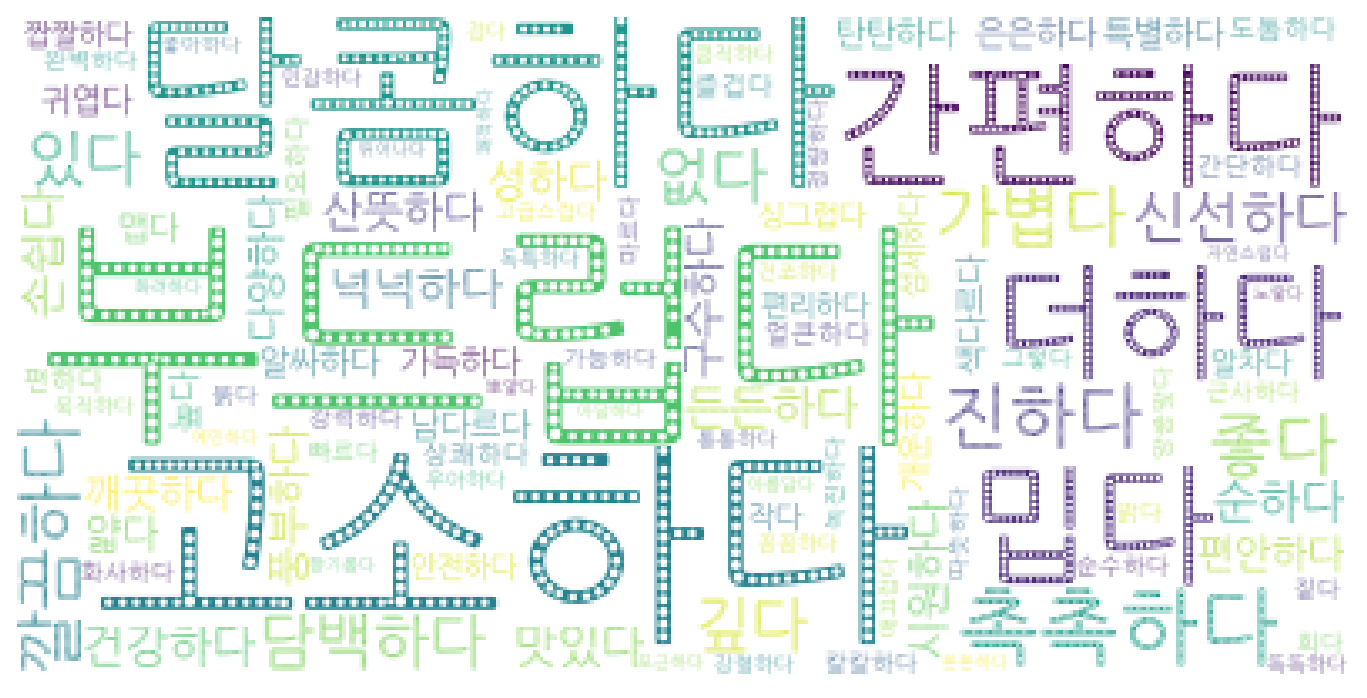

In [ ]:
from wordcloud import WordCloud
%config InlineBackend.figure_format='retina'

data = word_counts.most_common(100)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
contents_counts = Counter()

# ÌÜ†ÌÅ∞ÌôîÎêú Í∞Å Î¶¨Î∑∞ Î¶¨Ïä§Ìä∏Î•º Ïπ¥Ïö¥ÌÑ∞ Í∞ùÏ≤¥Ïóê ÏóÖÎç∞Ïù¥Ìä∏ Ìï©ÎãàÎã§. 
df['adj_contents'].apply(lambda x: contents_counts.update(x))

# Í∞ÄÏû• ÎßéÏù¥ Ï°¥Ïû¨ÌïòÎäî Îã®Ïñ¥ ÏàúÏúºÎ°ú 10Í∞úÎ•º ÎÇòÏó¥Ìï©ÎãàÎã§
contents_counts.most_common(5)

[('ÏûàÎã§', 17107), ('Ï¢ãÎã§', 6333), ('ÏóÜÎã§', 3295), ('Î∂ÄÎìúÎüΩÎã§', 3051), ('Í∞ÑÌé∏ÌïòÎã§', 2776)]

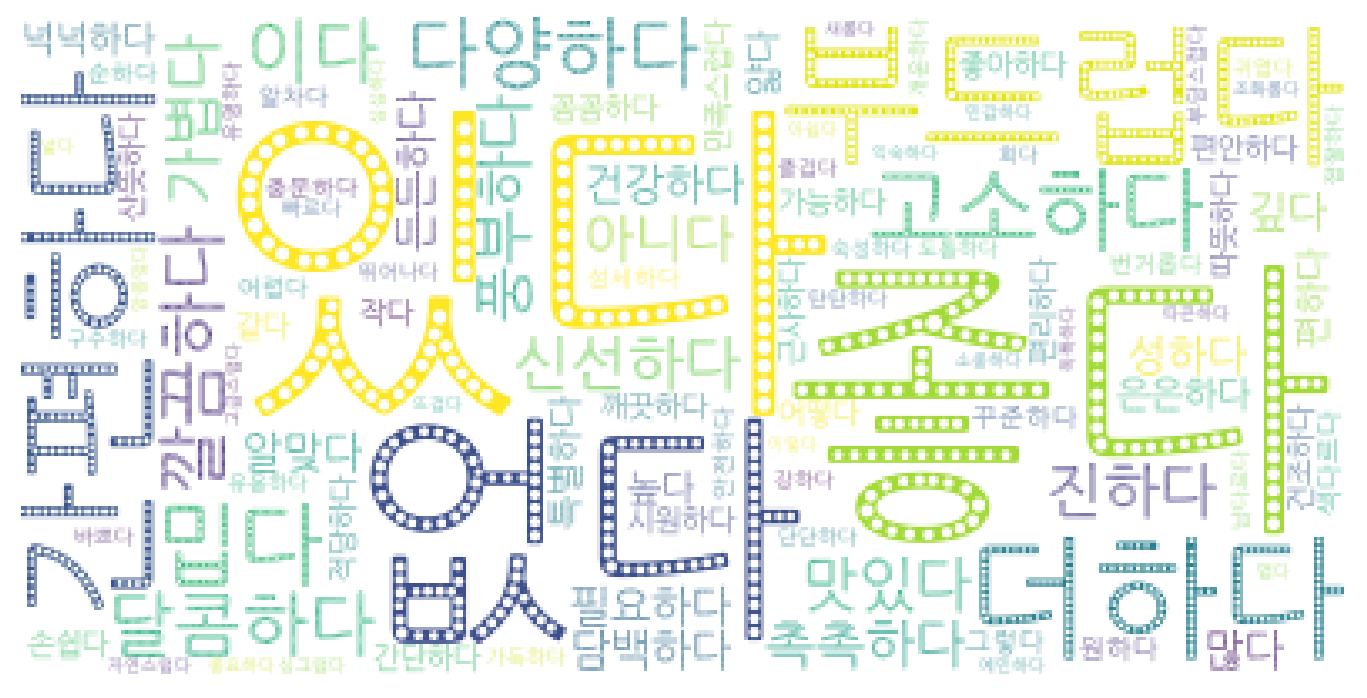

In [ ]:
data = contents_counts.most_common(100)

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='#FFFFFF').generate_from_frequencies(dict(data))

plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

- Ï†úÎ™© Ïπ¥ÌîºÏóêÎäî 'Î∂ÄÎìúÎüΩÎã§, Í≥†ÏÜåÌïòÎã§, Í∞ÑÌé∏ÌïòÎã§, Îã¨ÏΩ§ÌïòÎã§'ÏôÄ Í∞ôÏùÄ Î©îÎâ¥Ïùò ÌäπÏßïÏùÑ Ï∂ïÏïΩÌïú ÌòïÏö©ÏÇ¨Í∞Ä Ï£ºÎ°ú ÏÇ¨Ïö©Îê®
- Ïª®ÌÖêÏ∏† Ïπ¥ÌîºÏóêÎäî 'ÏûàÎã§. Ï¢ãÎã§. ÏóÜÎã§. ÎçîÌïòÎã§.' ÏôÄ Í∞ôÏùÄ ÎèôÏÇ¨Ìòï ÌòïÏö©ÏÇ¨Í∞Ä Ï£ºÎ°ú ÏÇ¨Ïö©Îê®

## Í∏∏Ïù¥ Í∏∞Ï§Ä

Title ÏµúÎåÄ Í∏∏Ïù¥ : 16
Title ÌèâÍ∑† Í∏∏Ïù¥ : 7.353484264611432 



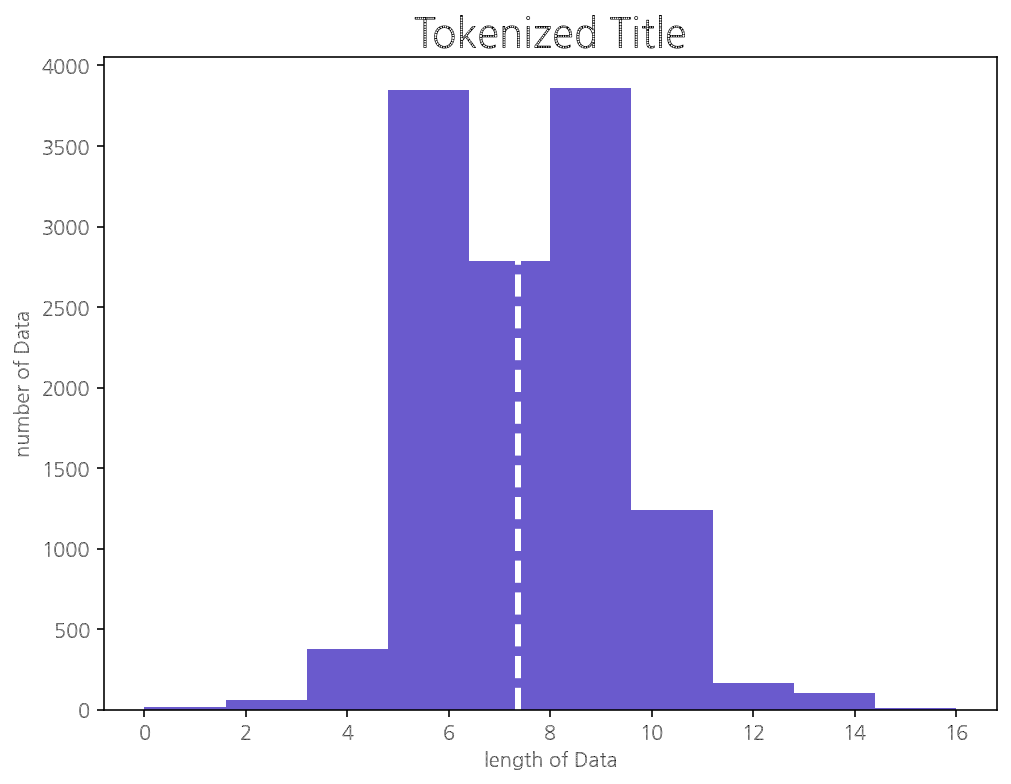

In [ ]:
max_text = max(len(l) for l in title_token)
mean_text = sum(map(len, title_token)) / len(title_token)
print('Title ÏµúÎåÄ Í∏∏Ïù¥ : {}'.format(max_text)) 
print('Title ÌèâÍ∑† Í∏∏Ïù¥ : {} \n'.format(mean_text)) 

plt.figure(figsize=(8,6))
plt.hist([len(s) for s in title_token], color='slateblue') 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.title('Tokenized Title', fontdict={'fontsize':20})
plt.axvline(x=mean_text, color='w', linestyle='--', linewidth=3)
plt.show()

Contents ÏµúÎåÄ Í∏∏Ïù¥ : 125
Contents ÌèâÍ∑† Í∏∏Ïù¥ : 54.37516056518947 



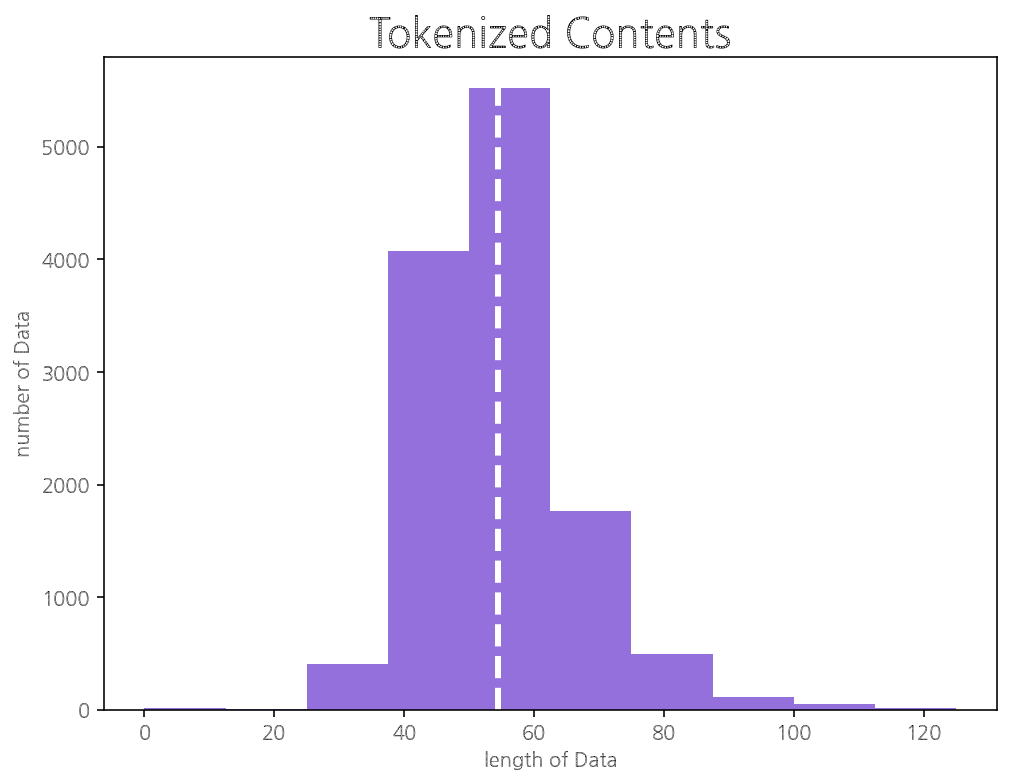

In [ ]:
max_text = max(len(l) for l in contents_token)
mean_text = sum(map(len, contents_token)) / len(contents_token)
print('Contents ÏµúÎåÄ Í∏∏Ïù¥ : {}'.format(max_text)) 
print('Contents ÌèâÍ∑† Í∏∏Ïù¥ : {} \n'.format(mean_text)) 

plt.figure(figsize=(8,6))
plt.hist([len(s) for s in contents_token], color='mediumpurple') 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.title('Tokenized Contents', fontdict={'fontsize':20})
plt.axvline(x=mean_text, color='w', linestyle='--', linewidth=3)
plt.show()

# ÌÜ†ÌÅ∞Ìôî

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(title_token)
vocab_size = len(title_token)+1
vocab_size

12457

In [ ]:
sequences = list()

for line in title_token: 
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:6]

[[1513, 1919],
 [1513, 1919, 117],
 [1513, 1919, 117, 118],
 [1513, 1919, 117, 118, 29],
 [1513, 1919, 117, 118, 29, 1421],
 [1269, 3384]]

In [ ]:
index_to_word={}
for key, value in tokenizer.word_index.items(): 
    index_to_word[value] = key

In [ ]:
sequences = pad_sequences(sequences, maxlen=max_text, padding='pre')
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [ ]:
y = to_categorical(y, num_classes=vocab_size)

# Î™®Îç∏ ÏÉùÏÑ±

In [ ]:
!pip install pyyaml h5py

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# callback, earlysotpping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

## epochs=10, acc=0.4

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_text-1))
# yÎç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨ÌïòÏòÄÏúºÎØÄÎ°ú Ïù¥Ï†ú XÎç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥Îäî Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥ - 1
model.add(LSTM(128))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, batch_size=32, epochs=10, callbacks=[es, mc])

Epoch 1/10
2474/2474 [==============================] - 87s 34ms/step - loss: 7.7086 - accuracy: 0.0266
Epoch 2/10
2474/2474 [==============================] - 85s 34ms/step - loss: 6.8707 - accuracy: 0.0567
Epoch 3/10
2474/2474 [==============================] - 85s 34ms/step - loss: 6.2098 - accuracy: 0.1002
Epoch 4/10
2474/2474 [==============================] - 85s 34ms/step - loss: 5.6128 - accuracy: 0.1400
Epoch 5/10
2474/2474 [==============================] - 84s 34ms/step - loss: 5.0805 - accuracy: 0.1796
Epoch 6/10
2474/2474 [==============================] - 84s 34ms/step - loss: 4.6049 - accuracy: 0.2208
Epoch 7/10
2474/2474 [==============================] - 84s 34ms/step - loss: 4.1705 - accuracy: 0.2676
Epoch 8/10
2474/2474 [==============================] - 84s 34ms/step - loss: 3.7757 - accuracy: 0.3180
Epoch 9/10
2474/2474 [==============================] - 84s 34ms/step - loss: 3.4221 - accuracy: 0.3687
Epoch 10/10
2474/2474 [==============================] - 84s 34m

In [ ]:
def sentence_generation(model, t, current_word, n): # Î™®Îç∏, ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä, ÌòÑÏû¨ Îã®Ïñ¥, Î∞òÎ≥µÌï† ÌöüÏàò
    init_word = current_word # Ï≤òÏùå Îì§Ïñ¥Ïò® Îã®Ïñ¥ÎèÑ ÎßàÏßÄÎßâÏóê Í∞ôÏù¥ Ï∂úÎ†•ÌïòÍ∏∞ÏúÑÌï¥ Ï†ÄÏû•
    sentence = ''
    for _ in range(n): # nÎ≤à Î∞òÎ≥µ
        encoded = t.texts_to_sequences([current_word])[0] # ÌòÑÏû¨ Îã®Ïñ¥Ïóê ÎåÄÌïú Ï†ïÏàò Ïù∏ÏΩîÎî©
        encoded = pad_sequences([encoded], maxlen=23, padding='pre') # Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Ìå®Îî©
        result = model.predict_classes(encoded, verbose=0)
    # ÏûÖÎ†•Ìïú X(ÌòÑÏû¨ Îã®Ïñ¥)Ïóê ÎåÄÌï¥ÏÑú yÎ•º ÏòàÏ∏°ÌïòÍ≥† y(ÏòàÏ∏°Ìïú Îã®Ïñ¥)Î•º resultÏóê Ï†ÄÏû•.
        for word, index in t.word_index.items(): 
            if index == result: # ÎßåÏïΩ ÏòàÏ∏°Ìïú Îã®Ïñ¥ÏôÄ Ïù∏Îç±Ïä§ÏôÄ ÎèôÏùºÌïú Îã®Ïñ¥Í∞Ä ÏûàÎã§Î©¥
                break # Ìï¥Îãπ Îã®Ïñ¥Í∞Ä ÏòàÏ∏° Îã®Ïñ¥Ïù¥ÎØÄÎ°ú break
        current_word = current_word + ' '  + word # ÌòÑÏû¨ Îã®Ïñ¥ + ' ' + ÏòàÏ∏° Îã®Ïñ¥Î•º ÌòÑÏû¨ Îã®Ïñ¥Î°ú Î≥ÄÍ≤Ω
        sentence = sentence + ' ' + word # ÏòàÏ∏° Îã®Ïñ¥Î•º Î¨∏Ïû•Ïóê Ï†ÄÏû•
    # forÎ¨∏Ïù¥ÎØÄÎ°ú Ïù¥ ÌñâÎèôÏùÑ Îã§Ïãú Î∞òÎ≥µ
    sentence = init_word + ' ' + sentence
    return sentence

In [ ]:
model.save('model_3rd_10.h5')

In [ ]:
print(sentence_generation(model, tokenizer, 'ÏÉêÎü¨Îìú', 6))
print(sentence_generation(model, tokenizer, 'ÍπÄÏπòÏ∞åÍ∞ú', 6))
print(sentence_generation(model, tokenizer, 'Îñ°Î≥∂Ïù¥', 6))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ÏÉêÎü¨Îìú  ÌÜ†Ìïë ÌïòÎã§ Ï¶êÍ∏∞Îã§ ÏûÖ ÏÉêÎü¨Îìú ÎàÑ
ÍπÄÏπòÏ∞åÍ∞ú  ÌïòÎã§ ÏôÑÏÑ± ÎêòÎã§ Îã¨ÏΩ§ÌïòÎã§ Í≥ºÏùº Ïûº
Îñ°Î≥∂Ïù¥  Í≥ÑÏ†à Îì†Îì†ÌïòÎã§ ÌïòÎã§ Í∑∏Î¶á Í∞àÎπÑÌÉï Î≤ÑÏÑØ


In [ ]:
# ÍπÄÏπò>Îß§ÏΩ§>Í∞êÏπ†Îßõ>Ï£ºÍæ∏ÎØ∏ Ïàú

## epochs=20, acc=0.74


In [ ]:
model = tf.keras.models.load_model('model_3rd_20.h5')
model.evaluate(X,y)

2474/2474 [==============================] - 23s 9ms/step - loss: 1.2092 - accuracy: 0.7463


[1.2091503143310547, 0.7463016510009766]

In [ ]:
print(sentence_generation(model, tokenizer, 'ÏÉêÎü¨Îìú', 6))
print(sentence_generation(model, tokenizer, 'ÍπÄÏπòÏ∞åÍ∞ú', 6))
print(sentence_generation(model, tokenizer, 'Îñ°Î≥∂Ïù¥', 6))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ÏÉêÎü¨Îìú  ÌÜ†Ìïë ÌïòÎã§ Ï¢ãÎã§ Ï´ÑÍπÉ Ïñ¥Î¨µ Ï°∞Í∞Å
ÍπÄÏπòÏ∞åÍ∞ú  ÏãùÍ∞ê Í∑∏ÎåÄÎ°ú Îã¥Îã§ Ï∞® ÌïúÏûî Ï†úÏ£º
Îñ°Î≥∂Ïù¥  ÏÜåÍ≥†Í∏∞ ÎçîÌïòÎã§ Îß§ÏΩ§ Î∞òÏ∞¨ Ï†úÏú° Î≥∂Ïùå


## epochs=50, acc=0.82

In [ ]:
history=model.fit(X, y, batch_size=32, epochs=30, callbacks=[es, mc])

Epoch 1/30
2474/2474 [==============================] - 66s 27ms/step - loss: 1.3544 - accuracy: 0.7119
Epoch 2/30
2474/2474 [==============================] - 66s 27ms/step - loss: 1.2727 - accuracy: 0.7258
Epoch 3/30
2474/2474 [==============================] - 65s 26ms/step - loss: 1.2080 - accuracy: 0.7376
Epoch 4/30
2474/2474 [==============================] - 66s 27ms/step - loss: 1.1515 - accuracy: 0.7470
Epoch 5/30
2474/2474 [==============================] - 66s 27ms/step - loss: 1.1014 - accuracy: 0.7562
Epoch 6/30
2474/2474 [==============================] - 66s 27ms/step - loss: 1.0533 - accuracy: 0.7633
Epoch 7/30
2474/2474 [==============================] - 67s 27ms/step - loss: 1.0145 - accuracy: 0.7705
Epoch 8/30
2474/2474 [==============================] - 67s 27ms/step - loss: 0.9761 - accuracy: 0.7763
Epoch 9/30
2474/2474 [==============================] - 67s 27ms/step - loss: 0.9421 - accuracy: 0.7824
Epoch 10/30
2474/2474 [==============================] - 67s 27m

In [ ]:
model = tf.keras.models.load_model('model_3rd_50.h5')
model.evaluate(X,y)

2474/2474 [==============================] - 23s 9ms/step - loss: 0.5547 - accuracy: 0.8431


[0.5546950697898865, 0.8430839776992798]

In [ ]:
print(sentence_generation(model, tokenizer, 'ÏÉêÎü¨Îìú', 6))
print(sentence_generation(model, tokenizer, 'ÍπÄÏπòÏ∞åÍ∞ú', 6))
print(sentence_generation(model, tokenizer, 'Îñ°Î≥∂Ïù¥', 6))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ÏÉêÎü¨Îìú  ÌÜ†Ìïë ÌôúÏö© ÌïòÎã§ Ï†úÍ≤© ÎπÑÍ±¥ ÏñëÎÖê
ÍπÄÏπòÏ∞åÍ∞ú  ÍπÉ Í≥†ÏÜåÌïòÎã§ Í∞êÏπ†Îßõ ÍπÄÏπò ÎßåÎëê Î∞∞
Îñ°Î≥∂Ïù¥  Ïù¥ÌÉàÎ¶¨ÏïÑ Ìñ• Î∞âÎã§ Ïä§Î™®ÌÅ¨ Í≥†Í∏∞ ÌéòÏä§


In [ ]:
model.save('model_3rd_50.h5') 

## epochs=100, acc=0.82

In [ ]:
history=model.fit(X, y, batch_size=30, epochs=50, callbacks=[es, mc])

Epoch 1/50
2639/2639 [==============================] - 71s 27ms/step - loss: 0.6633 - accuracy: 0.8182
Epoch 2/50
2639/2639 [==============================] - 68s 26ms/step - loss: 0.6573 - accuracy: 0.8185
Epoch 3/50
2639/2639 [==============================] - 68s 26ms/step - loss: 0.6518 - accuracy: 0.8190
Epoch 4/50
2639/2639 [==============================] - 68s 26ms/step - loss: 0.6473 - accuracy: 0.8211
Epoch 5/50
2639/2639 [==============================] - 68s 26ms/step - loss: 0.6462 - accuracy: 0.8207
Epoch 6/50
2639/2639 [==============================] - 70s 27ms/step - loss: 0.6403 - accuracy: 0.8205
Epoch 7/50
2639/2639 [==============================] - 69s 26ms/step - loss: 0.6392 - accuracy: 0.8198
Epoch 8/50
2639/2639 [==============================] - 70s 26ms/step - loss: 0.6363 - accuracy: 0.8208
Epoch 9/50
2639/2639 [==============================] - 71s 27ms/step - loss: 0.6343 - accuracy: 0.8213
Epoch 10/50
2639/2639 [==============================] - 71s 27m

In [ ]:
model = tf.keras.models.load_model('model_3rd_100.h5')
model.evaluate(X,y)

2474/2474 [==============================] - 23s 9ms/step - loss: 0.4961 - accuracy: 0.8456


[0.49608492851257324, 0.8455979824066162]

In [ ]:
print(sentence_generation(model, tokenizer, 'ÏÉêÎü¨Îìú', 6))
print(sentence_generation(model, tokenizer, 'ÍπÄÏπòÏ∞åÍ∞ú', 6))
print(sentence_generation(model, tokenizer, 'Îñ°Î≥∂Ïù¥', 6))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ÏÉêÎü¨Îìú  ÌÜ†Ìïë ÌôúÏö© ÌïòÎã§ Ï†úÍ≤© ÎπÑÍ±¥ ÏñëÎÖê
ÍπÄÏπòÏ∞åÍ∞ú  ÏúÑ ÏàòÏ†ú Íªå Ïú†Í∏∞ÎÜç Ïò§ÎØ∏Ïûê Î®∏
Îñ°Î≥∂Ïù¥  Í∞êÏπ†Îßõ Îì¨Îøç Î∞∞Îã§ Í∞àÎπÑÏ∞ú Ïï° Ìã∞ÎπÑ


# Í∏∞Î≥∏ Î™®Îç∏ (Î∂àÏö©Ïñ¥ Îì± Ï†úÍ±∞ X)

In [ ]:
tokens = []

for i in range(len(titles)):
  tokens.append(okt.morphs(titles[i]))

In [ ]:
text = tokens
t = Tokenizer()
t.fit_on_texts(text)
vocab_size = len(text)+1
vocab_size

12457

In [ ]:
tokens[0]

['Ìï©Î¶¨', 'Ï†Å', 'Í∞ÄÍ≤©', 'ÏúºÎ°ú', 'ÎßåÎÇòÎäî', 'Íµ≠ÎÇ¥', 'ÏÇ∞', 'Ïï†Ìò∏Î∞ï', 'Ïï†Ìò∏Î∞ï']

In [ ]:
sequences = []

for line in text: 
    encoded = t.texts_to_sequences([line])[0] 
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

In [ ]:
max_len=max(len(l) for l in sequences)
print('ÏÉòÌîåÏùò ÏµúÎåÄ Í∏∏Ïù¥ : {}'.format(max_len))

ÏÉòÌîåÏùò ÏµúÎåÄ Í∏∏Ïù¥ : 25


In [ ]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

## epochs=3, acc=0.2

In [ ]:
model_base = Sequential()
model_base.add(Embedding(vocab_size, 128, input_length=max_len-1))
# yÎç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨ÌïòÏòÄÏúºÎØÄÎ°ú Ïù¥Ï†ú XÎç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥Îäî Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥ - 1
model_base.add(LSTM(128))
model_base.add(Dense(vocab_size, activation='softmax'))
model_base.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model_base.fit(X, y, batch_size=32, epochs=3)

Epoch 1/3
3655/3655 [==============================] - 106s 29ms/step - loss: 7.3215 - accuracy: 0.0507
Epoch 2/3
3655/3655 [==============================] - 104s 29ms/step - loss: 6.1010 - accuracy: 0.1317
Epoch 3/3
3655/3655 [==============================] - 103s 28ms/step - loss: 5.2852 - accuracy: 0.1928


In [ ]:
print(sentence_generation(model_base, t, 'ÏÉêÎü¨Îìú', 6))
print(sentence_generation(model_base, t, 'ÍπÄÏπòÏ∞åÍ∞ú', 6))
print(sentence_generation(model_base, t, 'Îñ°Î≥∂Ïù¥', 6))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ÏÉêÎü¨Îìú  ÏôÄ Ìï®Íªò Ï¶êÍ∏∞Îäî Ïú†Í∏∞ÎÜç Í∑ÄÎ¶¨ Ïú†Í∏∞ÎÜç
ÍπÄÏπòÏ∞åÍ∞ú  ÏóêÏÑú Ïò® ÏïÑÏù¥ Î•º ÏúÑ Ìïú
Îñ°Î≥∂Ïù¥  Ïùò Ìíç ÎØ∏Î•º Îã¥ÏùÄ Ìïú ÎÅº


## epochs=10, acc=0.62

In [ ]:
history=model_base.fit(X, y, batch_size=32, epochs=10)

In [ ]:
model_base=keras.models.load_model('model_base_10.h5')

In [ ]:
print(sentence_generation(model_base, t, 'ÏÉêÎü¨Îìú', 6))
print(sentence_generation(model_base, t, 'ÍπÄÏπòÏ∞åÍ∞ú', 6))
print(sentence_generation(model_base, t, 'Îñ°Î≥∂Ïù¥', 6))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ÏÉêÎü¨Îìú  Ïóê Íµ¨Ïõå Î®πÎçò Ï∂îÏñµ Ïùò Îßõ
ÍπÄÏπòÏ∞åÍ∞ú  Î•º ÎçîÌï¥ ÎçîÏö± ÏãúÏõêÌïú ÏïåÌÉï ÏÇ¨Í≥®
Îñ°Î≥∂Ïù¥  Ïùò Ìñ• Í∏ã Ìï® ÏùÑ ÎçîÌïú


## epochs=20, acc=0.79

In [ ]:
history=model_base.fit(X, y, batch_size=32, epochs=10)

In [ ]:
model_base=keras.models.load_model('model_base_20.h5')

In [ ]:
print(sentence_generation(model_base, t, 'ÏÉêÎü¨Îìú', 6))
print(sentence_generation(model_base, t, 'ÍπÄÏπòÏ∞åÍ∞ú', 6))
print(sentence_generation(model_base, t, 'Îñ°Î≥∂Ïù¥', 6))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ÏÉêÎü¨Îìú  ÎÇò ÌîºÏûê ÌÜ†Ìïë ÏúºÎ°ú ÌÜ°ÌÜ° ÎÉâÎèô
ÍπÄÏπòÏ∞åÍ∞ú  Î•º ÎçîÌï¥ Îçî Ïò§Îûò Ïì∞Îäî Î∞©Î≤ï
Îñ°Î≥∂Ïù¥  Ïùò Ìíç ÎØ∏Î•º ÎëêÎ£® Îã¥ÏùÄ Í∞ÑÌé∏


## epochs=50, acc=0.2

In [ ]:
history=model_base.fit(X, y, batch_size=32, epochs=30)

In [ ]:
model_base=keras.models.load_model('model_base_50.h5')

In [ ]:
print(sentence_generation(model_base, t, 'ÏÉêÎü¨Îìú', 6))
print(sentence_generation(model_base, t, 'ÍπÄÏπòÏ∞åÍ∞ú', 6))
print(sentence_generation(model_base, t, 'Îñ°Î≥∂Ïù¥', 6))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ÏÉêÎü¨Îìú  ÎåÄÏã† Í∞ÄÎ≥çÍ≤å Ï¶êÍ∏∞Îäî Ìïú ÎÅº ÎßõÏÇ¥
ÍπÄÏπòÏ∞åÍ∞ú  Î•º ÎçîÌï¥ Ïò§Îûò Ïì∞Îäî Î∞©Î≤ï Ïãú
Îñ°Î≥∂Ïù¥  Ïùò ÍπäÏùÄ Ìíç ÎØ∏Í∞Ä Î≤® ÏßÄÏïà


## epochs=100, acc=0.2

In [ ]:
history=model_base.fit(X, y, batch_size=32, epochs=50)

In [ ]:
model_base=keras.models.load_model('model_base_100.h5')

In [ ]:
print(sentence_generation(model_base, t, 'ÏÉêÎü¨Îìú', 6))
print(sentence_generation(model_base, t, 'ÍπÄÏπòÏ∞åÍ∞ú', 6))
print(sentence_generation(model_base, t, 'Îñ°Î≥∂Ïù¥', 6))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ÏÉêÎü¨Îìú  ÎÇò ÌîºÏûê ÌÜ†Ìïë ÏúºÎ°ú ÌÜ°ÌÜ° ÎÉâÎèô
ÍπÄÏπòÏ∞åÍ∞ú  Î•º ÏÇ¨Ïö© ÌïòÎäî Î¨¥ Ìï≠ÏÉùÏ†ú 1Îì±
Îñ°Î≥∂Ïù¥  Ïùò ÍπäÍ≥† Îã¥Î∞±Ìïú Îßõ Ïùò Ï°∞Ìôî


# +$a$) Ïñ¥Ïö∏Î¶¨Îäî ÌòïÏö©ÏÇ¨ Ï∞æÍ∏∞

In [ ]:
df = df.drop(218).reset_index(drop=True)

In [ ]:
title_ls = []
for i in df['stem_title'] :
  try:
    title_ls.append(i[-1])
  except:
    title_ls.append('')

In [ ]:
df['title_ls'] = title_ls

In [ ]:
df_adj = df[['title_ls','adj_contents']]
df_adj = df_adj.groupby('title_ls').sum().reset_index()

In [ ]:
# ÏÉùÎûµ ÏóÜÏù¥ Ï∂úÎ†•
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
df_adj.loc[df_adj['title_ls'].str.contains('ÍπÄÏπòÏ∞åÍ∞ú')]

title_ls  \
257  ÍπÄÏπòÏ∞åÍ∞ú      

                                                                                                                                                                                                                                                                                                                       adj_contents  
257  [Í∞ÑÌé∏ÌïòÎã§, ÏûàÎã§, ÏßÑÌïòÎã§, ÍπäÎã§, ÏÑ±ÌïòÎã§, ÎçîÌïòÎã§, ÏπºÏπºÌïòÎã§, Ï¢ãÎã§, ÏûàÎã§, Îî∞ÎÅàÌïòÎã§, Îì†Îì†ÌïòÎã§, Í∞úÏö¥ÌïòÎã§, Ï¢ãÎã§, Ï†ïÍ∞àÌïòÎã§, ÎßåÏ°±Ïä§ÎüΩÎã§, Í∞ÑÌé∏ÌïòÎã§, ÏóÜÎã§, ÏûàÎã§, Îã¨ÏΩ§ÌïòÎã§, Î∂ÄÎìúÎüΩÎã§, ÏûàÎã§, ÏôÑÎ≤ΩÌïòÎã§, Ïß≠Ïß§ÌïòÎã§, Í≥†ÏÜåÌïòÎã§, Í∞ôÎã§, ÌäπÎ≥ÑÌïòÎã§, ÏßÑÌïòÎã§, ÍπäÎã§, ÏûàÎã§, ÌÅºÏßÅÌïòÎã§, Í≥†ÏÜåÌïòÎã§, ÎçîÌïòÎã§, Îî∞ÎÅàÎî∞ÎÅàÌïòÎã§, Îì†Îì†ÌïòÎã§, ÏûàÎã§, ÎßõÏûàÎã§, Ïø∞Ïø∞ÌïòÎã§, ÏûàÎã§, Í∞úÏö¥ÌïòÎã§, ÍπîÎÅîÌïòÎã§, ÎΩÄÏñóÎã§, ÎÑâÎÑâÌïòÎã§, ÎçîÌïòÎã§, Î≥ÑÎã§Î•¥Îã§, ÏóÜÎã§, ÌäºÏã§ÌïòÎã§, ÏÉâÎã§Î•¥Îã§, ÏñºÌÅ∞ÌïòÎã§, ÏßÑÌïòÎã§, Ï¥âÏ¥âÌïòÎã§, Î∂ÄÎìúÎüΩÎã§, Ï¢ãÎã§, ÏÑ±ÌïòÎã§, ÏãúÏõêÌïòÎã§, ÏûàÎã§, ÏûàÎã§, ÏûàÎã§, Ïñ¥Î†µÎã§, Ïù¥Îã§, ÍπäÎã§, ÏãúÌÅºÌïòÎã§]

In [ ]:
df_adj.loc[df_adj['title_ls'].str.contains('ÏÉêÎü¨Îìú')]

title_ls  \
1396  ÏÉêÎü¨Îìú       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                adj_contents  
1396  [ÏßôÎã§, ÌíçÎ∂ÄÌïòÎã§, Í∞ÑÌé∏ÌïòÎã§, ÏûàÎã§, Ï¢ãÏïÑÌïòÎã§, ÎßéÎã§, Í∑∏ÎìùÌïòÎã§, ÏûàÎã§, ÏóÜÎã§, Ïù¥Îã§, Í≥†ÏÜåÌïòÎã§, ÎÑâÎÑâÌïòÎã§, Ïã±Í∑∏ÎüΩÎã§, Î∂ÄÎìúÎüΩÎã§, Ï°∞ÌôîÎ°≠Îã§, ÏÑ±ÌïòÎã§, Í≥†ÏÜåÌïòÎã§, Î∞âÎã§, ÎçîÌïòÎã§, Í±¥Í∞ïÌïòÎã§, Î≤àÍ±∞Î°≠Îã§, Ïñ¥Î†µÎã§, Îã§ÏñëÌïòÎã§, Í∞ÑÌé∏ÌïòÎã§, Îî∞Ïä§ÌïòÎã§, Í±¥Ï°∞ÌïòÎã§, ÏûëÎã§, Ï¢ãÎã§, Îî±Îî±ÌïòÎã§, Ìé∏ÏïàÌïòÎã§, Ïã†ÏÑ†ÌïòÎã§, Ï¢ãÎã§, Í≤ΩÏæåÌïòÎã§, Ïã±Í∑∏ÎüΩÎã§, Î≥ÑÎã§Î•¥Îã§, Í∞ÄÎ≥çÎã§, Í∞ÑÌé∏ÌïòÎã§, Ï¢ãÎã§, Ï¢ãÎã§, Ï¢ãÎã§, Ïú†Î™ÖÌïòÎã§, ÌäπÎ≥ÑÌïòÎã§, Ïñ¥ÎñªÎã§, Îî±Ïù¥Îã§, Îã¨ÏΩ§ÌïòÎã§, Ï°∞ÌôîÎ°≠Îã§, Îã§ÏñëÌïòÎã§, ÏÉàÎ°≠Îã§, Í∞ÑÌé∏ÌïòÎã§, ÏûàÎã§, ÏÑ±ÌïòÎã§, ÏûàÎã§, Ï∂©Î∂ÑÌïòÎã§, ÏûàÎã§, ÎäêÎÅºÌïòÎã§, Ï∂©Î∂ÑÌïòÎã§, Í∞ÑÌé∏ÌïòÎã§, ÏûàÎã§, Î∂ÄÎìúÎüΩÎã§, ÎçîÌïòÎã§, ÎçîÌïòÎã§, Í≥†ÏÜåÌïòÎã§, ÏûàÎã§, Ïã†ÏÑ†ÌïòÎã§, Îã¥Î∞±ÌïòÎã§, Íæ∏Ï§ÄÌïòÎã§, ÎÇ®Îã§Î•¥Îã§, Î∞âÎã§, ÏûàÎã§, ÏÉâÎã§Î•¥Îã§, ÏûàÎã§, Ï¢ãÎã§, Î∞âÎã§, Ï¥âÏ¥âÌïòÎã§, Î∂ÄÎìúÎüΩÎã§, ÎçîÌïòÎã§, ÏÉâÎã§Î•¥Îã§, Íæ∏Ï§ÄÌïòÎã§, ÎÇ®Îã§Î•¥Îã§, Î∞âÎã§, ÏûàÎã§, Í≥†ÏÜåÌïòÎã§, Í∞ÄÎìùÌïòÎã§, ÎçîÌïòÎã§, ÎßåÏ°±Ïä§ÎüΩÎã§, Íæ∏Ï§ÄÌïòÎã§, ÎÇ®Îã§Î•¥Îã§, Î∞âÎã§, ÏûàÎã§, ÌÜµÌÜµÌïòÎã§, Ïã±Í∑∏ÎüΩÎã§, ÏÑ±ÌïòÎã§, ÎçîÌïòÎã§, ÌÉ±ÌÉ±ÌïòÎã§, Îç•Îã§, Í∞ÑÌé∏ÌïòÎã§, Îì†Îì†ÌïòÎã§, ÏûàÎã§, ÏÑ†Î™ÖÌïòÎã§, Îã¥Î∞±ÌïòÎã§, ...]

In [ ]:
df_adj.loc[df_adj['title_ls'].str.contains('Îñ°Î≥∂Ïù¥')]

title_ls  \
599  Îñ°Î≥∂Ïù¥       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 adj_contents  
599  [Ï∂©Ïã§ÌïòÎã§, ÎßéÎã§, ÏûàÎã§, ÎßéÎã§, Ïú†Î™ÖÌïòÎã§, ÏûàÎã§, ÍπîÎÅîÌïòÎã§, Ï¢ãÏïÑÌïòÎã§, Îì†Îì†ÌïòÎã§, Ïù¥Îã§, ÏûàÎã§, ÍπäÎã§, Í∑ºÏÇ¨ÌïòÎã§, ÏûàÎã§, ÎçîÌïòÎã§, ÏÑ±ÌïòÎã§, ÍπîÎÅîÌïòÎã§, Îî±Ïù¥Îã§, Îã§ÏñëÌïòÎã§, Ï¢ãÎã§, Í≥†ÏÜåÌïòÎã§, ÌíçÎ∂ÄÌïòÎã§, ÏûàÎã§, Í∞ôÎã§, ÏûàÎã§, ÏûàÎã§, ÎèôÏùºÌïòÎã§, ÏñáÎã§, ÏπºÏπºÌïòÎã§, ÎßµÎã§, ÎßµÎã§, ÏûàÎã§, ÎçîÌïòÎã§, ÏûàÎã§, Í∞ôÎã§, Í∞ÑÌé∏ÌïòÎã§, ÏûàÎã§, Îç•Îã§, Îã¨ÏΩ§ÌïòÎã§, ÎßêÎûëÌïòÎã§, Ìé∏Î¶¨ÌïòÎã§, ÏûàÎã§, Í∞ÑÌé∏ÌïòÎã§, ÎèÖÌäπÌïòÎã§, Íµ¨ÏàòÌïòÎã§, Ï¢ãÏïÑÌïòÎã§, Îã¨ÏΩ§ÌïòÎã§, ÎçîÌïòÎã§, ÏÉàÎ°≠Îã§, ÎÑâÎÑâÌïòÎã§, Ï¢ãÎã§, Î∞âÎã§, Ïñ¥Î†µÎã§, Í∞ÑÎã®ÌïòÎã§, ÏûàÎã§, Ï†ÅÏ†àÌïòÎã§, Í∞ÑÌé∏ÌïòÎã§, Í∞ÄÎìùÌïòÎã§, Ï¶êÍ≤ÅÎã§, Îã¨ÏΩ§ÌïòÎã§, ÎçîÌïòÎã§, ÏïÑÍ∏∞ÏûêÍ∏∞ÌïòÎã§, ÌäπÎ≥ÑÌïòÎã§, Í∞ÑÌé∏ÌïòÎã§, ÏÉàÎ°≠Îã§, Ïú†Î™ÖÌïòÎã§, ÎßõÏûàÎã§, ÏóÜÎã§, ÏóÜÎã§, ÏóÜÎã§, Îã¨ÏΩ§ÌïòÎã§, ÎßõÏûàÎã§, ÎßµÎã§, ÏóÜÎã§, Ïù¥Îã§, ÏûàÎã§, ÍπîÎÅîÌïòÎã§, ÏïåÏ∞®Îã§, ÎÑâÎÑâÌïòÎã§, Îã§ÏñëÌïòÎã§, ÏûàÎã§, Îã¨ÏΩ§ÌïòÎã§, Ïù¥Îã§, ÎçîÌïòÎã§, ÎßõÏûàÎã§, Ï¢ãÎã§, Î≥ÑÎã§Î•¥Îã§, ÏóÜÎã§, Í∞ÑÌé∏ÌïòÎã§, ÏÉàÎ°≠Îã§, Ìé∏ÌïòÎã§, ÏûàÎã§, ÏûàÎã§, ÏûàÎã§, ÏÜêÏâΩÎã§, ÏûàÎã§, Ïù¥Îã§, ÏïÑÎãàÎã§, Ï°∞Ïö©ÌïòÎã§, ÏûàÎã§, ...]

# +$a$) Ïª®ÌÖêÏ∏† Ïπ¥ÌîºÎ°ú Î≤†Ïä§Ìä∏ÏÖÄÎü¨ ÏÉÅÌíà ÏòàÏ∏°

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.0    0.961542
1.0    0.038458
Name: label, dtype: float64


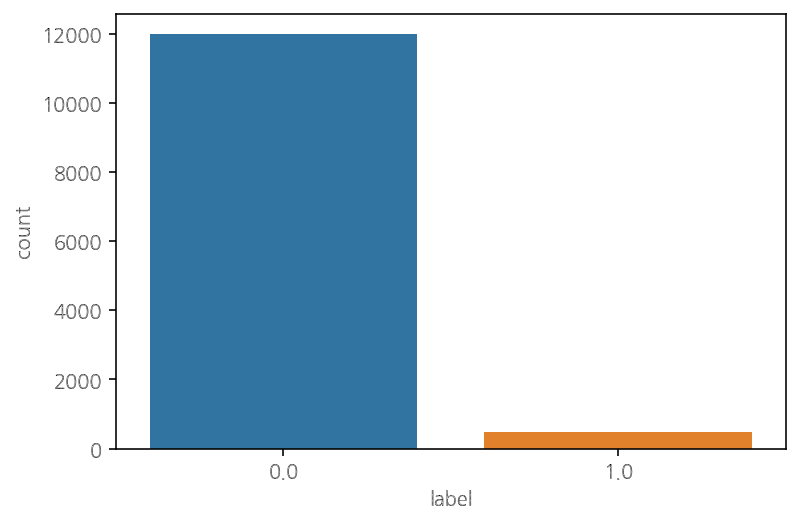

In [ ]:
#ÎπÑÏú®ÌôïÏù∏
import seaborn as sns

sns.countplot(df['label'])
plt.xlabel('label')
print(df['label'].value_counts(normalize=True))

In [ ]:
# ÌÉÄÍ≤üÍ∞í ÏßÄÏ†ï
X = df['stem_contents']
Y = df['label']

# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True, stratify=Y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9964,), (9964,), (2491,), (2491,))

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # Îã®Ïñ¥Ïùò Ïàò
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

# Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò Ïåç(pair)ÏùÑ keyÏôÄ valueÎ°ú Î∞õÎäîÎã§.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏúºÎ©¥
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ :',total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)

Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ : 16963
Îì±Ïû• ÎπàÎèÑÍ∞Ä 2Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 7310
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 43.093792371632375
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 1.7504032719474067


In [ ]:
# Ï†ÑÏ≤¥ Îã®Ïñ¥ Í∞úÏàò Ï§ë ÎπàÎèÑÏàò 3Ïù¥ÌïòÏù∏ Îã®Ïñ¥Îäî Ï†úÍ±∞.
# 0Î≤à Ìå®Îî© ÌÜ†ÌÅ∞ÏùÑ Í≥†Î†§ÌïòÏó¨ + 1
vocab_size = total_cnt - rare_cnt + 1
print('Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ :',vocab_size)

Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ : 9654


In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
# Îπà ÏÉòÌîåÎì§ÏùÑ Ï†úÍ±∞
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

9948
9948


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Î¶¨Î∑∞Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : 124
Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 53.51166063530358


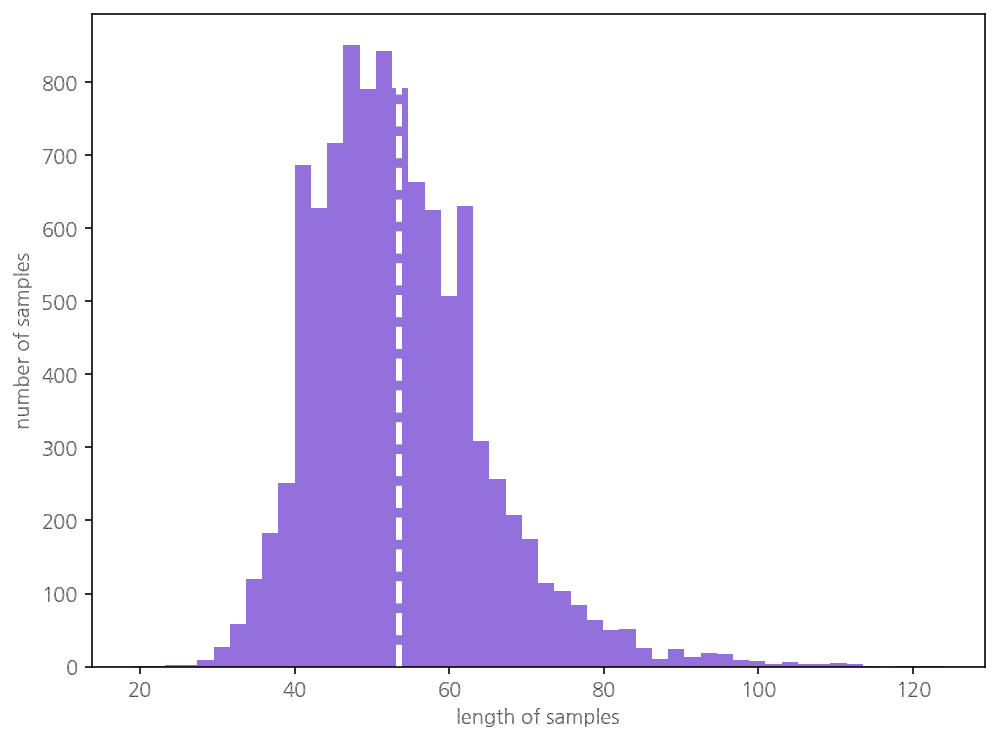

In [ ]:
print('Î¶¨Î∑∞Ïùò ÏµúÎåÄ Í∏∏Ïù¥ :',max(len(l) for l in X_train))
print('Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :',sum(map(len, X_train))/len(X_train))
plt.figure(figsize=(8,6))
plt.hist([len(s) for s in X_train], bins=50, color='mediumpurple')
plt.xlabel('length of samples')
plt.ylabel('number of samples')

plt.axvline(x=sum(map(len, X_train))/len(X_train), color='w', linestyle='--', linewidth=3)
plt.show()

In [ ]:
X_train = pad_sequences(X_train, maxlen = 80)
X_test = pad_sequences(X_test, maxlen = 80)

In [ ]:
model_pred = Sequential([
  Embedding(vocab_size, 128),
  LSTM(128),
  Dense(1, activation='sigmoid')
])

model_pred.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

In [ ]:
model_pred.fit(X_train,y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[es, mc])

Epoch 1/10
125/125 [==============================] - 7s 36ms/step - loss: 0.2009 - accuracy: 0.9563 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1578 - val_accuracy: 0.9628 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
125/125 [==============================] - 4s 31ms/step - loss: 0.1544 - accuracy: 0.9612 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1604 - val_accuracy: 0.9628 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
125/125 [==============================] - 4s 31ms/step - loss: 0.1106 - accuracy: 0.9644 - precision: 0.6857 - recall: 0.1553 - val_loss: 0.1698 - val_accuracy: 0.9603 - val_precision: 0.1429 - val_recall: 0.0135
Epoch 4/10
125/125 [==============================] - 4s 31ms/step - loss: 0.0713 - accuracy: 0.9769 - precision: 0.8238 - recall: 0.5146 - val_loss: 0.2113 - val_accuracy: 0.9618 - val_precision: 0.2500 - val_recall: 0.0135
Epoch 5/10
125/125 [==============================] - 4s 31ms/step -

In [ ]:
model_pred.evaluate(X_test, y_test)

78/78 [==============================] - 1s 7ms/step - loss: 0.2008 - accuracy: 0.9566 - precision: 0.2500 - recall: 0.0625


[0.20079612731933594, 0.9566439390182495, 0.25, 0.0625]

In [ ]:
def predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # ÌÜ†ÌÅ∞Ìôî
  new_sentence = [word for word in new_sentence if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
  encoded = tokenizer.texts_to_sequences([new_sentence]) # Ï†ïÏàò Ïù∏ÏΩîÎî©
  pad_new = pad_sequences(encoded, maxlen = 80) # Ìå®Îî©
  score = float(model_pred.predict(pad_new)) # ÏòàÏ∏°
  if(score > 0.5):
    print("{:.2f}% ÌôïÎ•†Î°ú Best seller ÏûÖÎãàÎã§.\n".format(score * 100))
  else:
    print("{:.2f}% ÌôïÎ•†Î°ú Best sellerÍ∞Ä ÏïÑÎãôÎãàÎã§.\n".format((1 - score) * 100))

In [ ]:
df.iloc[500]

title             Í∞ÑÌé∏ÌïòÍ≤å Ï¶êÍ∏∞Îäî ÏÉêÎü¨ÎìúÏö© Ï±ÑÏÜå  Í∑∏Î¶∞ÏÉêÎü¨Îìú ÌååÌîÑÎ¶¨Ïπ¥&Ï†ÅÏ±Ñ                                                                                                                                                                                                                                                                               
contents         Í∑∏Î¶∞ÏÉêÎü¨Îìú ÌååÌîÑÎ¶¨Ïπ¥&Ï†ÅÏ±ÑÎ°ú Ïã†ÏÑ†Ìïú ÏÉêÎü¨ÎìúÏö© Ï±ÑÏÜåÎ•º Ï¶êÍ≤® Î≥¥ÏÑ∏Ïöî. ÌîÑÎ¶¥ÎùºÏù¥Ï¶à(ÏñëÏÉÅÏ∂î), Î°úÎ©îÏù∏, Ï†ÅÍ∑ºÎåÄ, ÎùºÎîîÏπòÏò§Î•º Î®πÍ∏∞ Ï¢ãÏùÄ ÌÅ¨Í∏∞Î°ú Ïç∞Ïñ¥ Îã¥Í≥†, ÌååÌîÑÎ¶¨Ïπ¥ÏôÄ Ï†ÅÏ±ÑÎ•º Ï±ÑÏç∞Ïñ¥ ÌÜ†ÌïëÌñàÏñ¥Ïöî. ÏïÑÏÇ≠ÌïòÍ≤å ÏîπÌûàÎäî ÌîÑÎ¶¥ÎùºÏù¥Ï¶àÏôÄ Í≤ΩÏæåÌïú ÏãùÍ∞êÏùò ÌååÌîÑÎ¶¨Ïπ¥Î•º ÎπÑÎ°ØÌï¥ Îã§Ï±ÑÎ°úÏö¥ Ï±ÑÏÜåÎì§Ïù¥ ÎßåÎÇò ÎçîÏö± Ïã±Í∑∏Îü¨Ïö¥ ÎßõÏùÑ Ï†ÑÌïúÎãµÎãàÎã§. Î≥ÑÎã§Î•∏ ÏÜêÏßà ÏóÜÏù¥ Í∞ÄÎ≥çÍ≤å ÏîªÏñ¥ Ï£ºÍ∏∞Îßå ÌïòÎ©¥ ÎêòÎãà ÏÜåÏä§ÎÇò ÎìúÎ†àÏã±ÏùÑ Í≥ÅÎì§Ïó¨ ÏÉêÎü¨Îìú, ÏÉåÎìúÏúÑÏπò Îì±Ïóê Í∞ÑÌé∏ÌïòÍ≤å ÌôúÏö©ÌïòÍ∏∞ Ï¢ãÏùÑ Í±∞ÏòàÏöî. Ìïú Î≤àÏóê Ï¶êÍ∏∞Í∏∞ Ï¢ãÏùÄ 

In [ ]:
predict(df.iloc[500].contents)

99.26% ÌôïÎ•†Î°ú Best sellerÍ∞Ä ÏïÑÎãôÎãàÎã§.



In [ ]:
df.iloc[127]

title             Îì†Îì†ÌïòÍ≥† Ìë∏ÏßêÌïú Ìïú Í∑∏Î¶á  Í∞àÎπÑÌÉï                                                                                                                                                                                                                                                          
contents         Îî∞ÎúªÌïòÍ≤å ÏÜçÏùÑ Îç∞Ïö∞Îäî ÏöîÎ¶¨Î°ú Í∞àÎπÑÌÉïÏùÑ ÎπºÎÜìÏúºÎ©¥ ÏÑúÏö¥Ìï¥Ïöî. ÎºàÏóê Î∂ôÏùÄ Í∞àÎπÑÎ•º ÏÇ¥ÏÇ¥ Î∞úÎùº Íµ≠Î¨ºÍ≥º Ìï®Íªò Î®πÏúºÎ©¥ Î™∏Í≥º ÎßàÏùåÏù¥ Î™®Îëê Îì†Îì†Ìï¥ÏßÄÏ£†. Í∞àÎπÑÌÉïÏúºÎ°ú ÏÜåÎ¨∏ÎÇú Î∏åÎûúÎìúÏù∏ Í∞ïÎÇ®Î©¥Ïò• ÎòêÌïú Ìë∏ÏßêÌïú Í∞àÎπÑÌÉïÏùÑ Îì§Í≥† Ïª¨Î¶¨Î•º Ï∞æÏïòÏäµÎãàÎã§. ÏÇ¥Ïù¥ Ïã§ÌïòÍ≤å Î∂ôÏùÄ Ìò∏Ï£ºÏÇ∞ ÏÜåÍ∞àÎπÑÎ•º Í≥®Îùº Íπ®ÎÅóÌïòÍ≤å ÏÜêÏßàÌïòÍ≥†, ÏÇ∂ÏùÄ ÌõÑ Ïò§Îûò Îú∏ÏùÑ Îì§Ïó¨ Ïú°ÏßàÏù¥ Î∂ÄÎìúÎü¨ÏõåÏöî. Í∞àÎπÑ ÏÇ∂ÏùÄ Î¨ºÎ°ú Ïú°ÏàòÎ•º ÎßåÎì§Ïñ¥ Íµ≠Î¨ºÎßõ ÎòêÌïú ÍπäÏßÄÏöî. Ïûò Îç∞Ïö¥ ÌõÑ Î∞•Í≥º Ìï®Íªò Îú®ÎÅàÌïú Ìïú ÏÉÅÏùÑ Ï∞®Î†§Î≥¥ÏÑ∏Ïöî. Í∏∞Ìò∏Ïóê Îî∞Îùº ÌõÑÏ∂î, ÎãπÎ©¥ Îì±ÏùÑ ÎçîÌï¥ÏÑú ÎìúÏÖîÎèÑ Ï¢ãÏäµÎãàÎã§. 
label            1

In [ ]:
predict(df.iloc[127].contents)

86.78% ÌôïÎ•†Î°ú Best seller ÏûÖÎãàÎã§.



In [ ]:
new_sentence=sentence_generation(model, tokenizer, 'Í∞àÎπÑÌÉï', 54)
print(new_sentence)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Í∞àÎπÑÌÉï  Îî∞ÎÅàÌïòÎã§ ÏãùÍ∏∞ ÏôÄÏù∏ Í∞àÎπÑ ÏòÅÏñëÏÜå ÏÉâ ÎßàÏùå ÏÉà ÏïåÎßûÎã§ ÌÅ¨Î¶¨ÎØ∏ ÏùºÏÉÅ Ïª¨Î¶¨ Í≥†Ïöî ÏûêÍ∑π Ïö∏Îã§ ÏïåÎßûÎã§ ÏÜåÍ∞ú ÎßõÏûàÎã§ ÏÜåÍ∞ú Ìé∏ÌïòÎã§ ÏÑ±ÌïòÎã§ Î∂ÑÌï¥ ÎçîÎ∂àÎã§ ÏïåÎßûÎã§ Ïó¨Îü¨ Í∞àÎã§ ÏÑ†ÌÉù Î∂ÄÏúÑ ÌäÄÍπÄ Ïª¨Î¶¨ Íµ≠ÎÇ¥ Í∏∞Î∂Ñ Í∏∞ÏôÄ Ïø†ÏÖò ÏÜåÍ∞ú Íµ≠ÎÇ¥ Ìï® Î™®Ïñë Î≥∏Ïó∞ Ï†ÅÎã§ Ïãù Í∑∏ÎåÄÎ°ú Ï∂îÏñµ ÏóëÏä§Ìä∏Îùº Ïï° ÏïàÏã¨ Îã¥Í∏∞Îã§ Í≥†ÏÜåÌïòÎã§ Í≥†ÏÜåÌïòÎã§ Î≥∏Ïó∞ Í∞àÎã§ ÏßÄÎ∞© ÎÜíÎã§ Ïö∞Ïú†


In [ ]:
predict(new_sentence)

76.02% ÌôïÎ•†Î°ú Best sellerÍ∞Ä ÏïÑÎãôÎãàÎã§.



# 7. Í∞úÏÑ†Ï†ê
1. Ïª®ÌÖêÏ∏† Ïπ¥Ìîº Îç∞Ïù¥ÌÑ∞ ÏûÖÎ†• Ïãú Îû® Ïö©ÎüâÏù¥ Ï¥àÍ≥º ÎêòÏñ¥ Ï†úÎåÄÎ°ú ÌôúÏö©Ìï† Ïàò ÏóÜÏóàÎçò Ï†ê

  üëâüèª ÌôúÏö©Î∞©Ïïà Ï∞æÍ∏∞

2. Î≤†Ïä§Ìä∏ÏÖÄÎü¨ Îç∞Ïù¥ÌÑ∞Í∞Ä ÎÑàÎ¨¥ Ï†ÅÏùÄ Î∂àÍ∑†ÌòïÌïú Îç∞Ïù¥ÌÑ∞Î°ú ÏàòÏßëÌïú Ï†ê

  üëâüèª Îçî ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞ ÏàòÏßë

3. Î™®Îç∏ Ï∂úÎ†•Î¨ºÏù¥ ÏûêÏó∞Ïä§ÎüΩÏßÄ Î™ªÌïú Ï†ê

  üëâüèª Î∂àÏö©Ïñ¥ÎÇò ÌíàÏÇ¨Ïóê ÏûàÏñ¥ Ï†ÅÏ†ïÌïú Î≥ÄÌòïÏ†êÏùÑ Ï∞æÍ≥†, Î™®Îç∏ ÏÑ±Îä•ÏùÑ ÎÜíÏùº Ïàò ÏûàÎäî Î∞©ÏïàÏóê ÎåÄÌïú Í≥†ÎØº